# Credit Card Client notebook - Part 2

In [1]:
import numpy as numpy #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
# next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
import seaborn as sns # a fancy plotting package
mpl.rcParams['figure.dpi'] = 400 #high res figure
df = pd.read_csv("C:/Users/User/Desktop/Data Science/Data_Science - Credit Card Client/Cleaned_data.csv")

In [2]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [3]:
features_response = df.columns.tolist()

In [4]:
features_response[:5]

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE']

In [5]:
features_response[-5:]

['EDUCATION_CAT', 'graduate school', 'high school', 'others', 'university']

In [6]:
items_to_remove = ['ID','SEX','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','EDUCATION_CAT','graduate school','high school',
                   'university','none','others']
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [7]:
corr = df[features_response].corr()
corr.iloc[0:5,0:5]

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000


<AxesSubplot:>

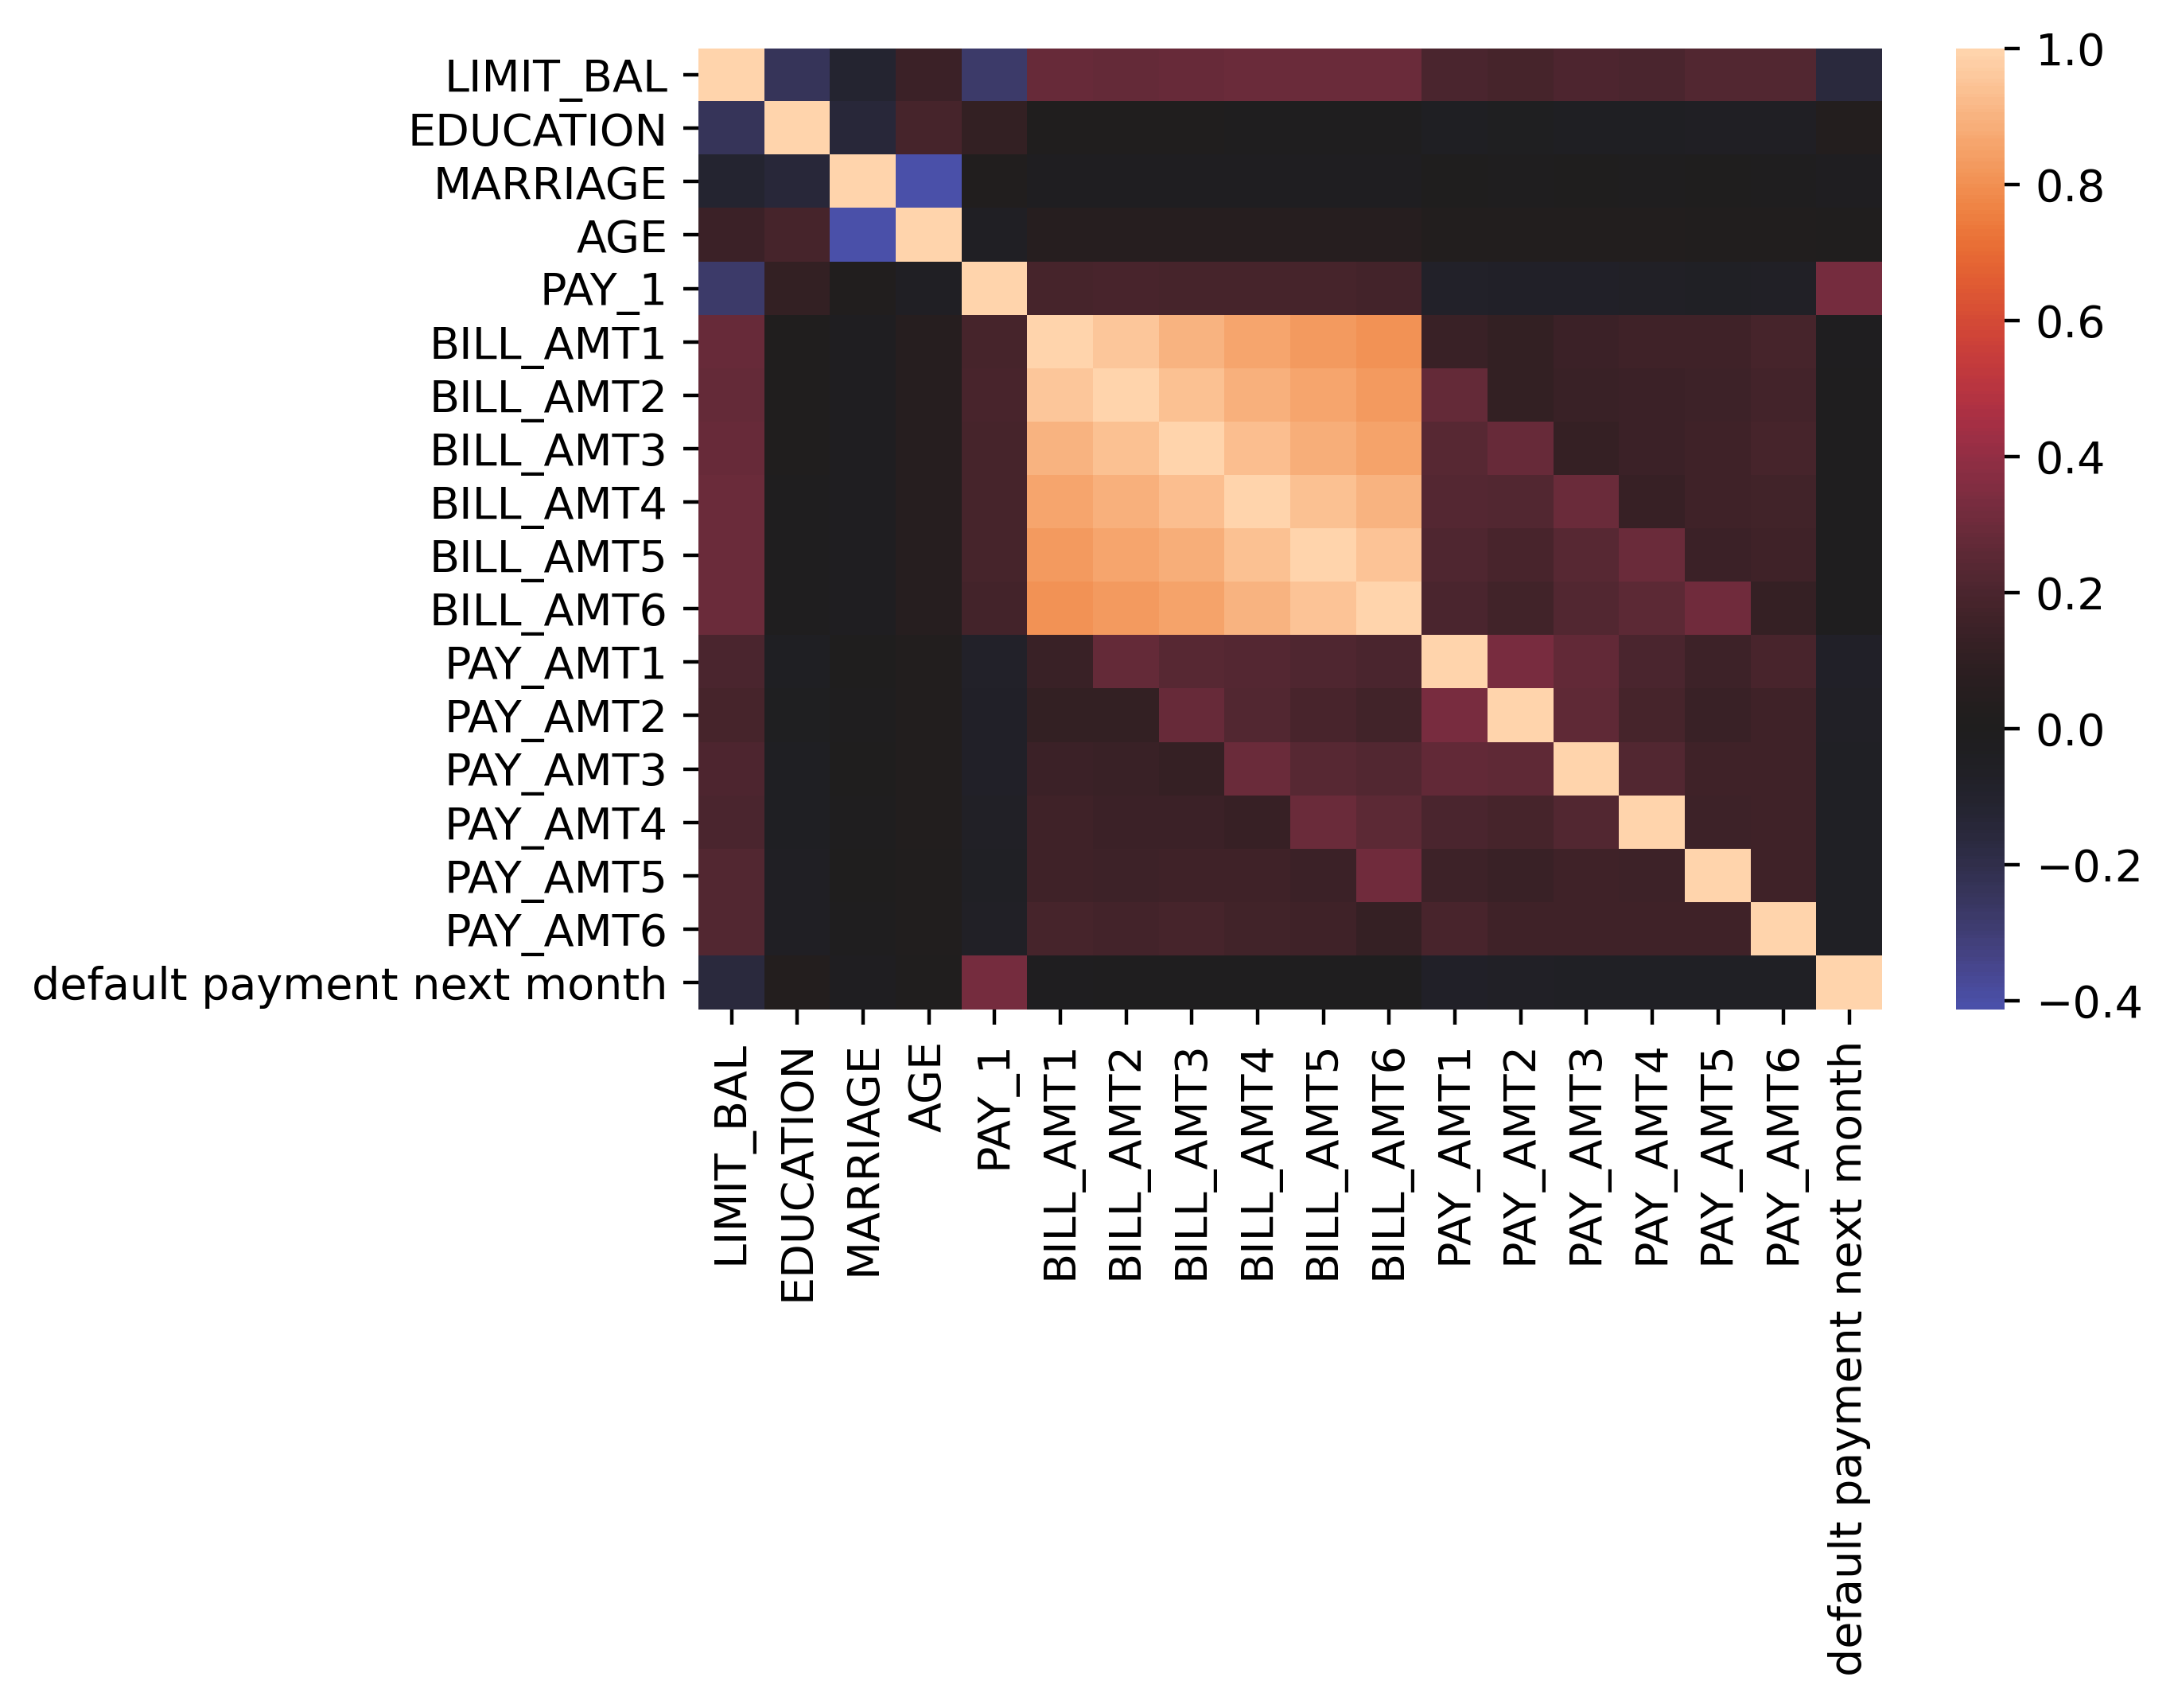

In [8]:
sns.heatmap(corr, xticklabels= corr.columns.values, yticklabels= corr.columns.values, center=0)

## ANOVA F-test

In [9]:
X = df[features_response].iloc[:,:-1].values
Y = df[features_response].iloc[:,-1].values
print(X.shape, Y.shape)

(26664, 17) (26664,)


In [10]:
from sklearn.feature_selection import f_classif
[f_stat, f_p_value] = f_classif(X, Y)

In [11]:
f_test_df = pd.DataFrame({'Feature':features_response[:-1],
                         'F statistic':f_stat,
                         'p value':f_p_value})
f_test_df.sort_values('p value')

,Feature,F statistic,p value
4,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
11,PAY_AMT1,140.612679,2.358354e-32
12,PAY_AMT2,101.408321,8.256124e-24
13,PAY_AMT3,90.023873,2.542641e-21
15,PAY_AMT5,85.843295,2.090120e-20
16,PAY_AMT6,80.420784,3.219565e-19
14,PAY_AMT4,79.640021,4.774112e-19
1,EDUCATION,32.637768,1.122175e-08
2,MARRIAGE,18.078027,2.127555e-05


In [12]:
from sklearn.feature_selection import SelectPercentile
selector = SelectPercentile(f_classif, percentile=20)

In [13]:
selector.fit(X, Y)

SelectPercentile(percentile=20)

In [14]:
best_feature_ix = selector.get_support()
best_feature_ix

array([ True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False])

In [15]:
features = features_response[:-1]
best_features = [features[counter] for counter in range (len(features)) if best_feature_ix[counter]]
best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

## Visualizing the relationship between features and response

In [16]:
overall_default_rate = df['default payment next month'].mean()
overall_default_rate

0.2217971797179718

In [17]:
import numpy as np
group_by_pay_mean_y = df.groupby('PAY_1').agg({'default payment next month':np.mean})
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


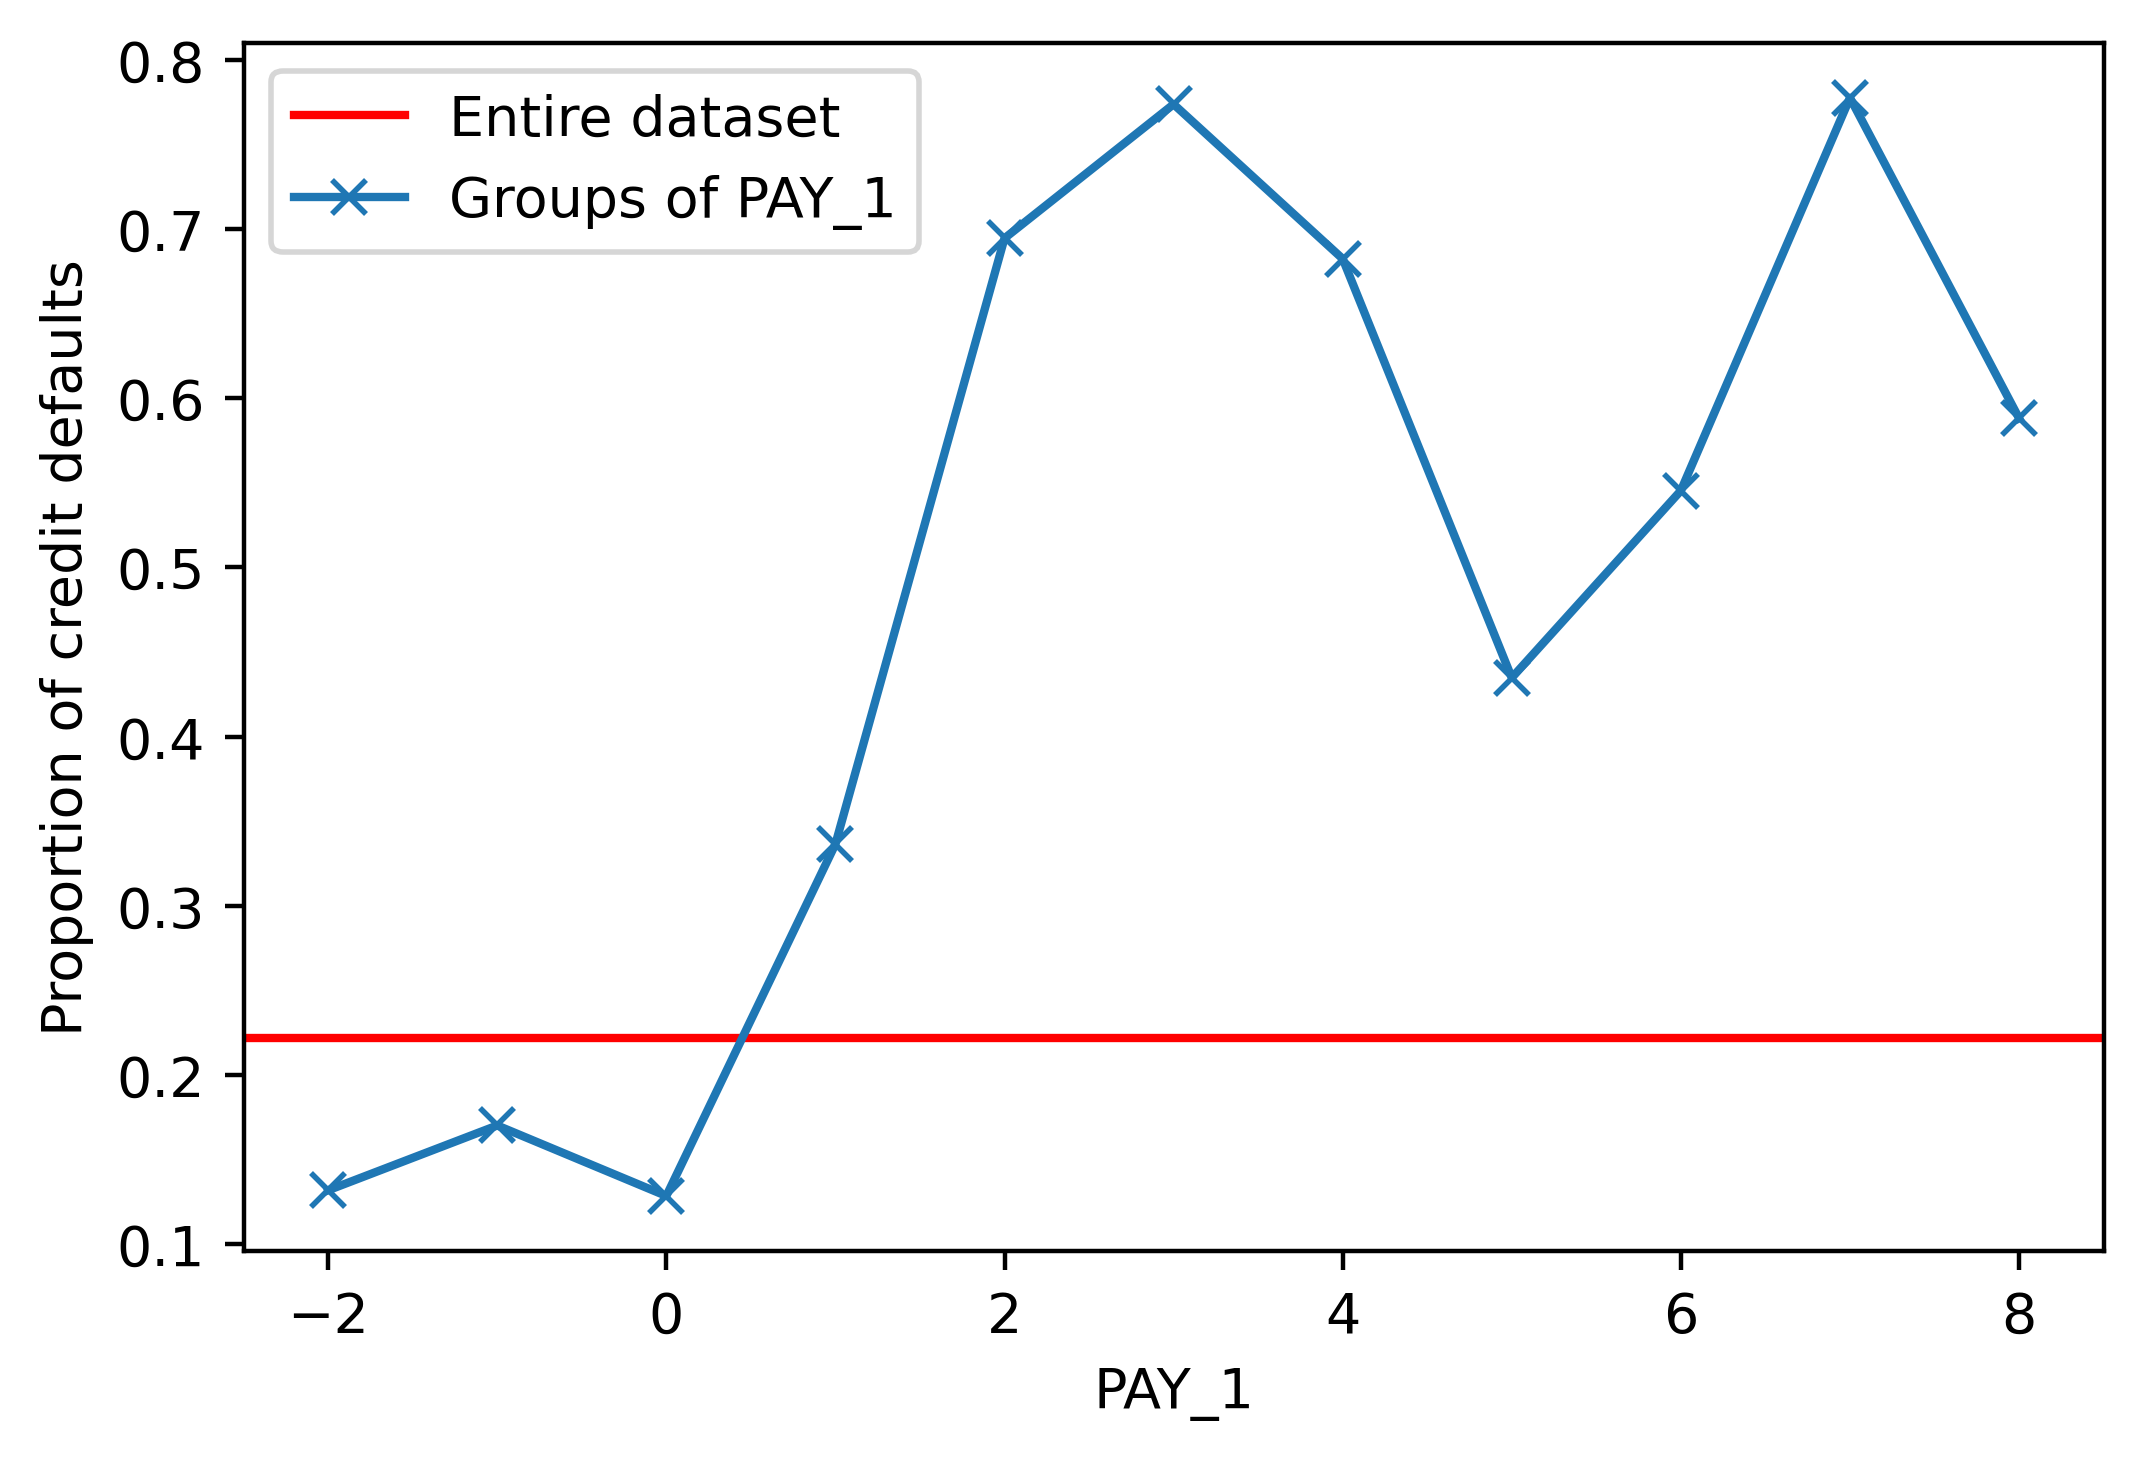

In [18]:
axes = plt.axes()
axes.axhline(overall_default_rate, color='red')
group_by_pay_mean_y.plot(marker='x', legend=False, ax= axes)
axes.set_ylabel('Proportion of credit defaults')
axes.legend(['Entire dataset','Groups of PAY_1'])

In [19]:
pos_mask = Y == 1
neg_mask = Y == 0

Text(0.5, 1.0, 'Credit limits by response variable')

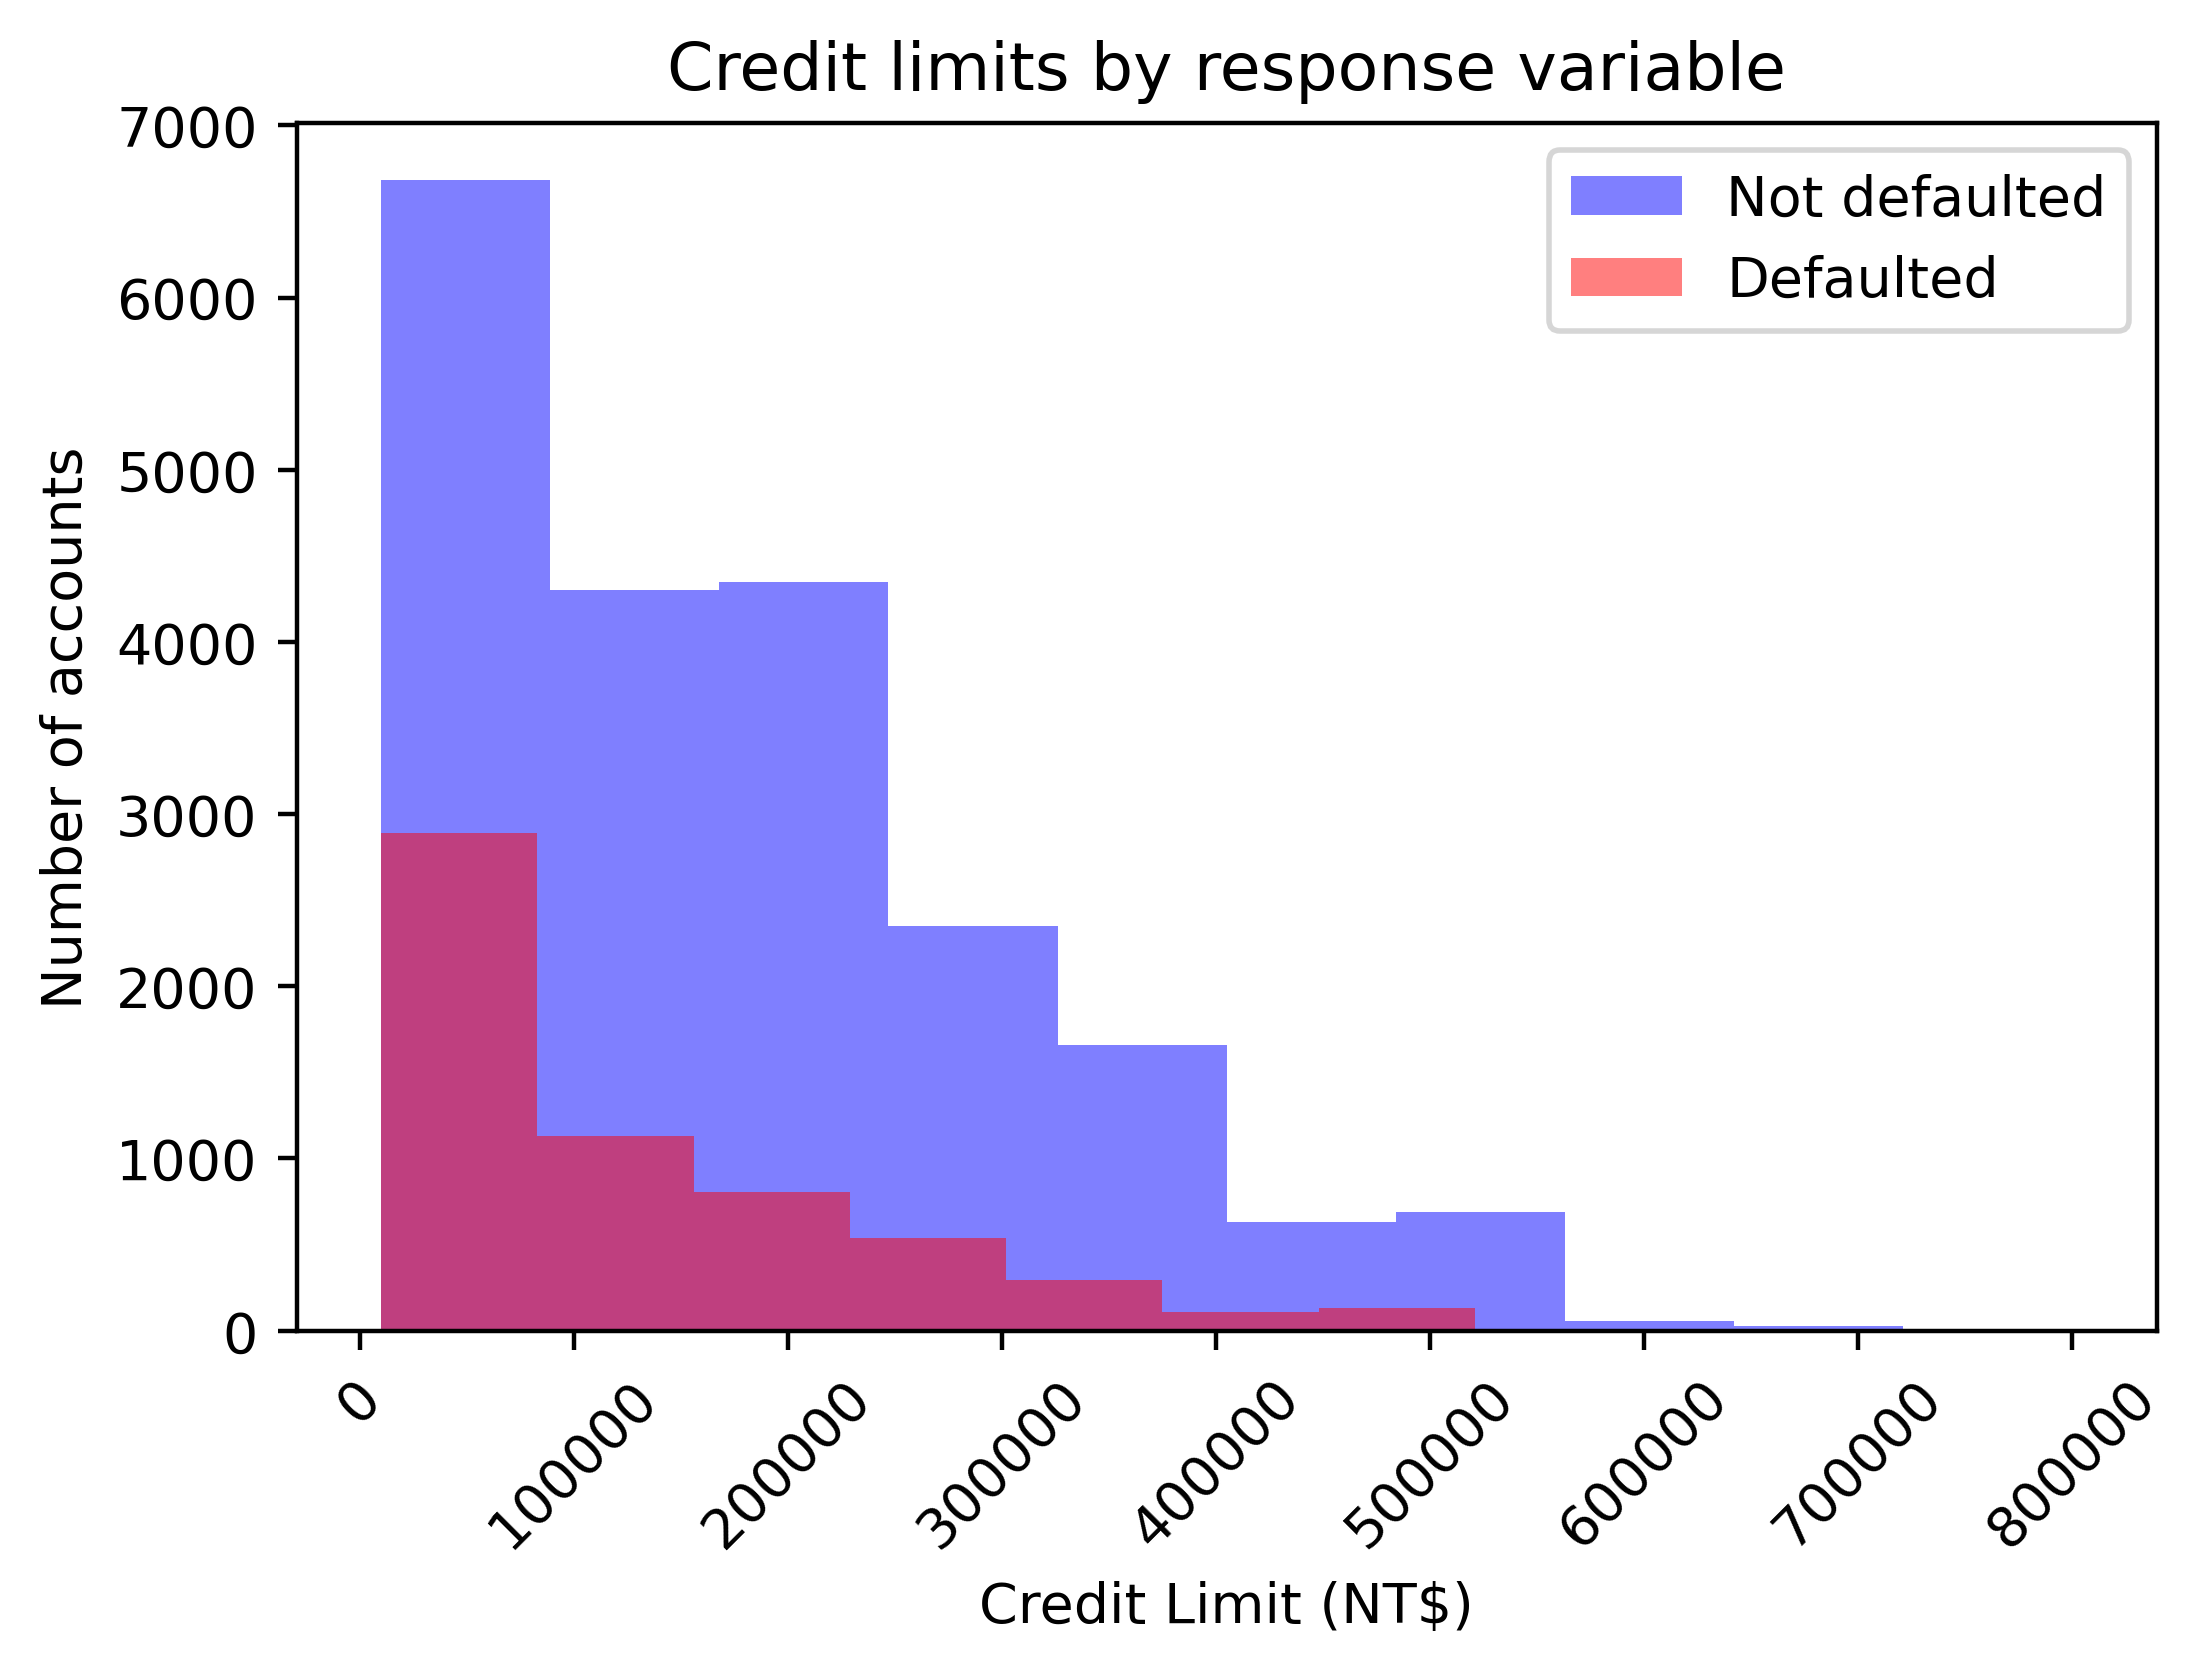

In [20]:
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], alpha=0.5, color='blue')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], alpha=0.5, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit Limit (NT$)')
axes.set_ylabel('Number of accounts')
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Credit limits by response variable')

In [21]:
bin_edges = list(range(0, 850000, 50000))
print(bin_edges[-1])

800000


<ipython-input-22-61d708374cef>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(np.round(y_ticks*50000,2))


Text(0.5, 1.0, 'Normalized distributions of credit limits by response variable')

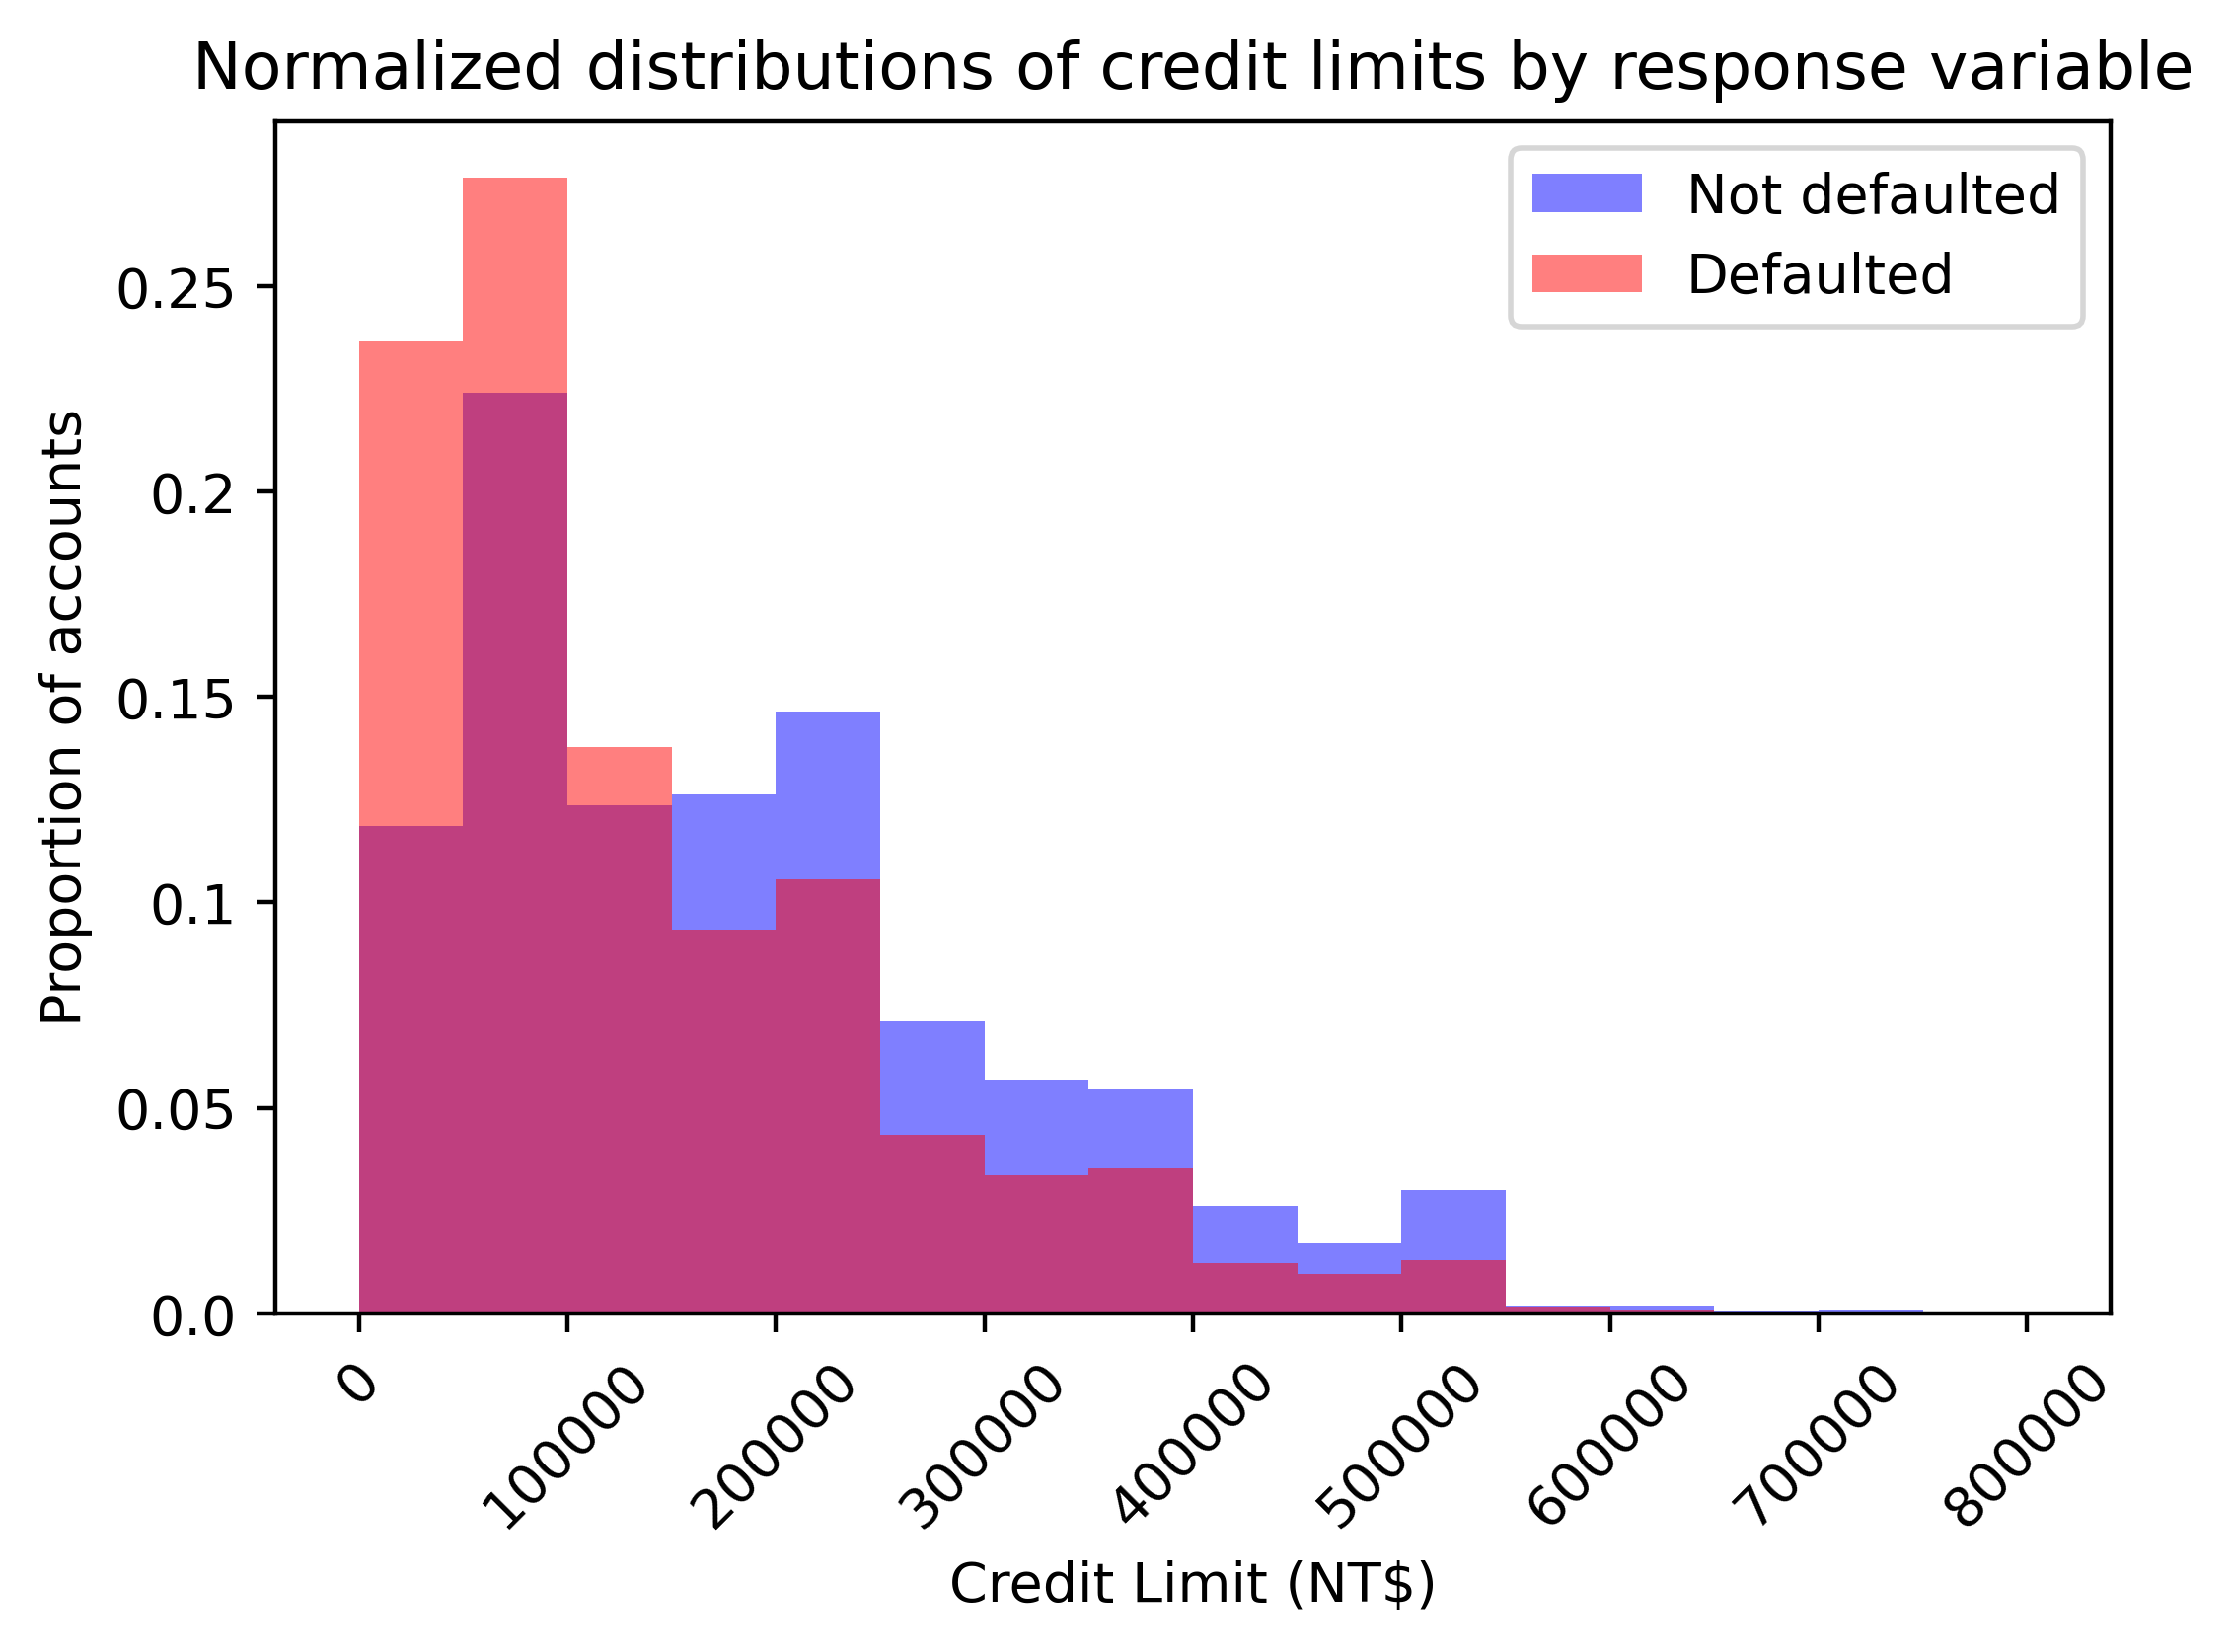

In [22]:
mpl.rcParams['figure.dpi'] = 400
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'],bins = bin_edges, alpha=0.5,density = True, color='blue')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'],bins = bin_edges, alpha=0.5,density = True, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit Limit (NT$)')
axes.set_ylabel('Proportion of accounts')
y_ticks = axes.get_yticks()
axes.set_yticklabels(np.round(y_ticks*50000,2))
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Normalized distributions of credit limits by response variable')

## Checking the appropriateness of a feature for Logistic Regression (Log odds)

In [23]:
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


In [24]:
p = group_by_pay_mean_y['default payment next month'].values
q= 1-p
print(p)
print(q)

[0.13166397 0.17000198 0.12829525 0.33639988 0.69470143 0.7739726
 0.68253968 0.43478261 0.54545455 0.77777778 0.58823529]
[0.86833603 0.82999802 0.87170475 0.66360012 0.30529857 0.2260274
 0.31746032 0.56521739 0.45454545 0.22222222 0.41176471]


In [25]:
odds_ratio = p/q
log_odds = np.log(odds_ratio)
log_odds

array([-1.88632574, -1.58561322, -1.91611649, -0.67937918,  0.82219194,
        1.23088026,  0.76546784, -0.26236426,  0.18232156,  1.25276297,
        0.35667494])

Text(0.5, 0, 'Values of PAY_1')

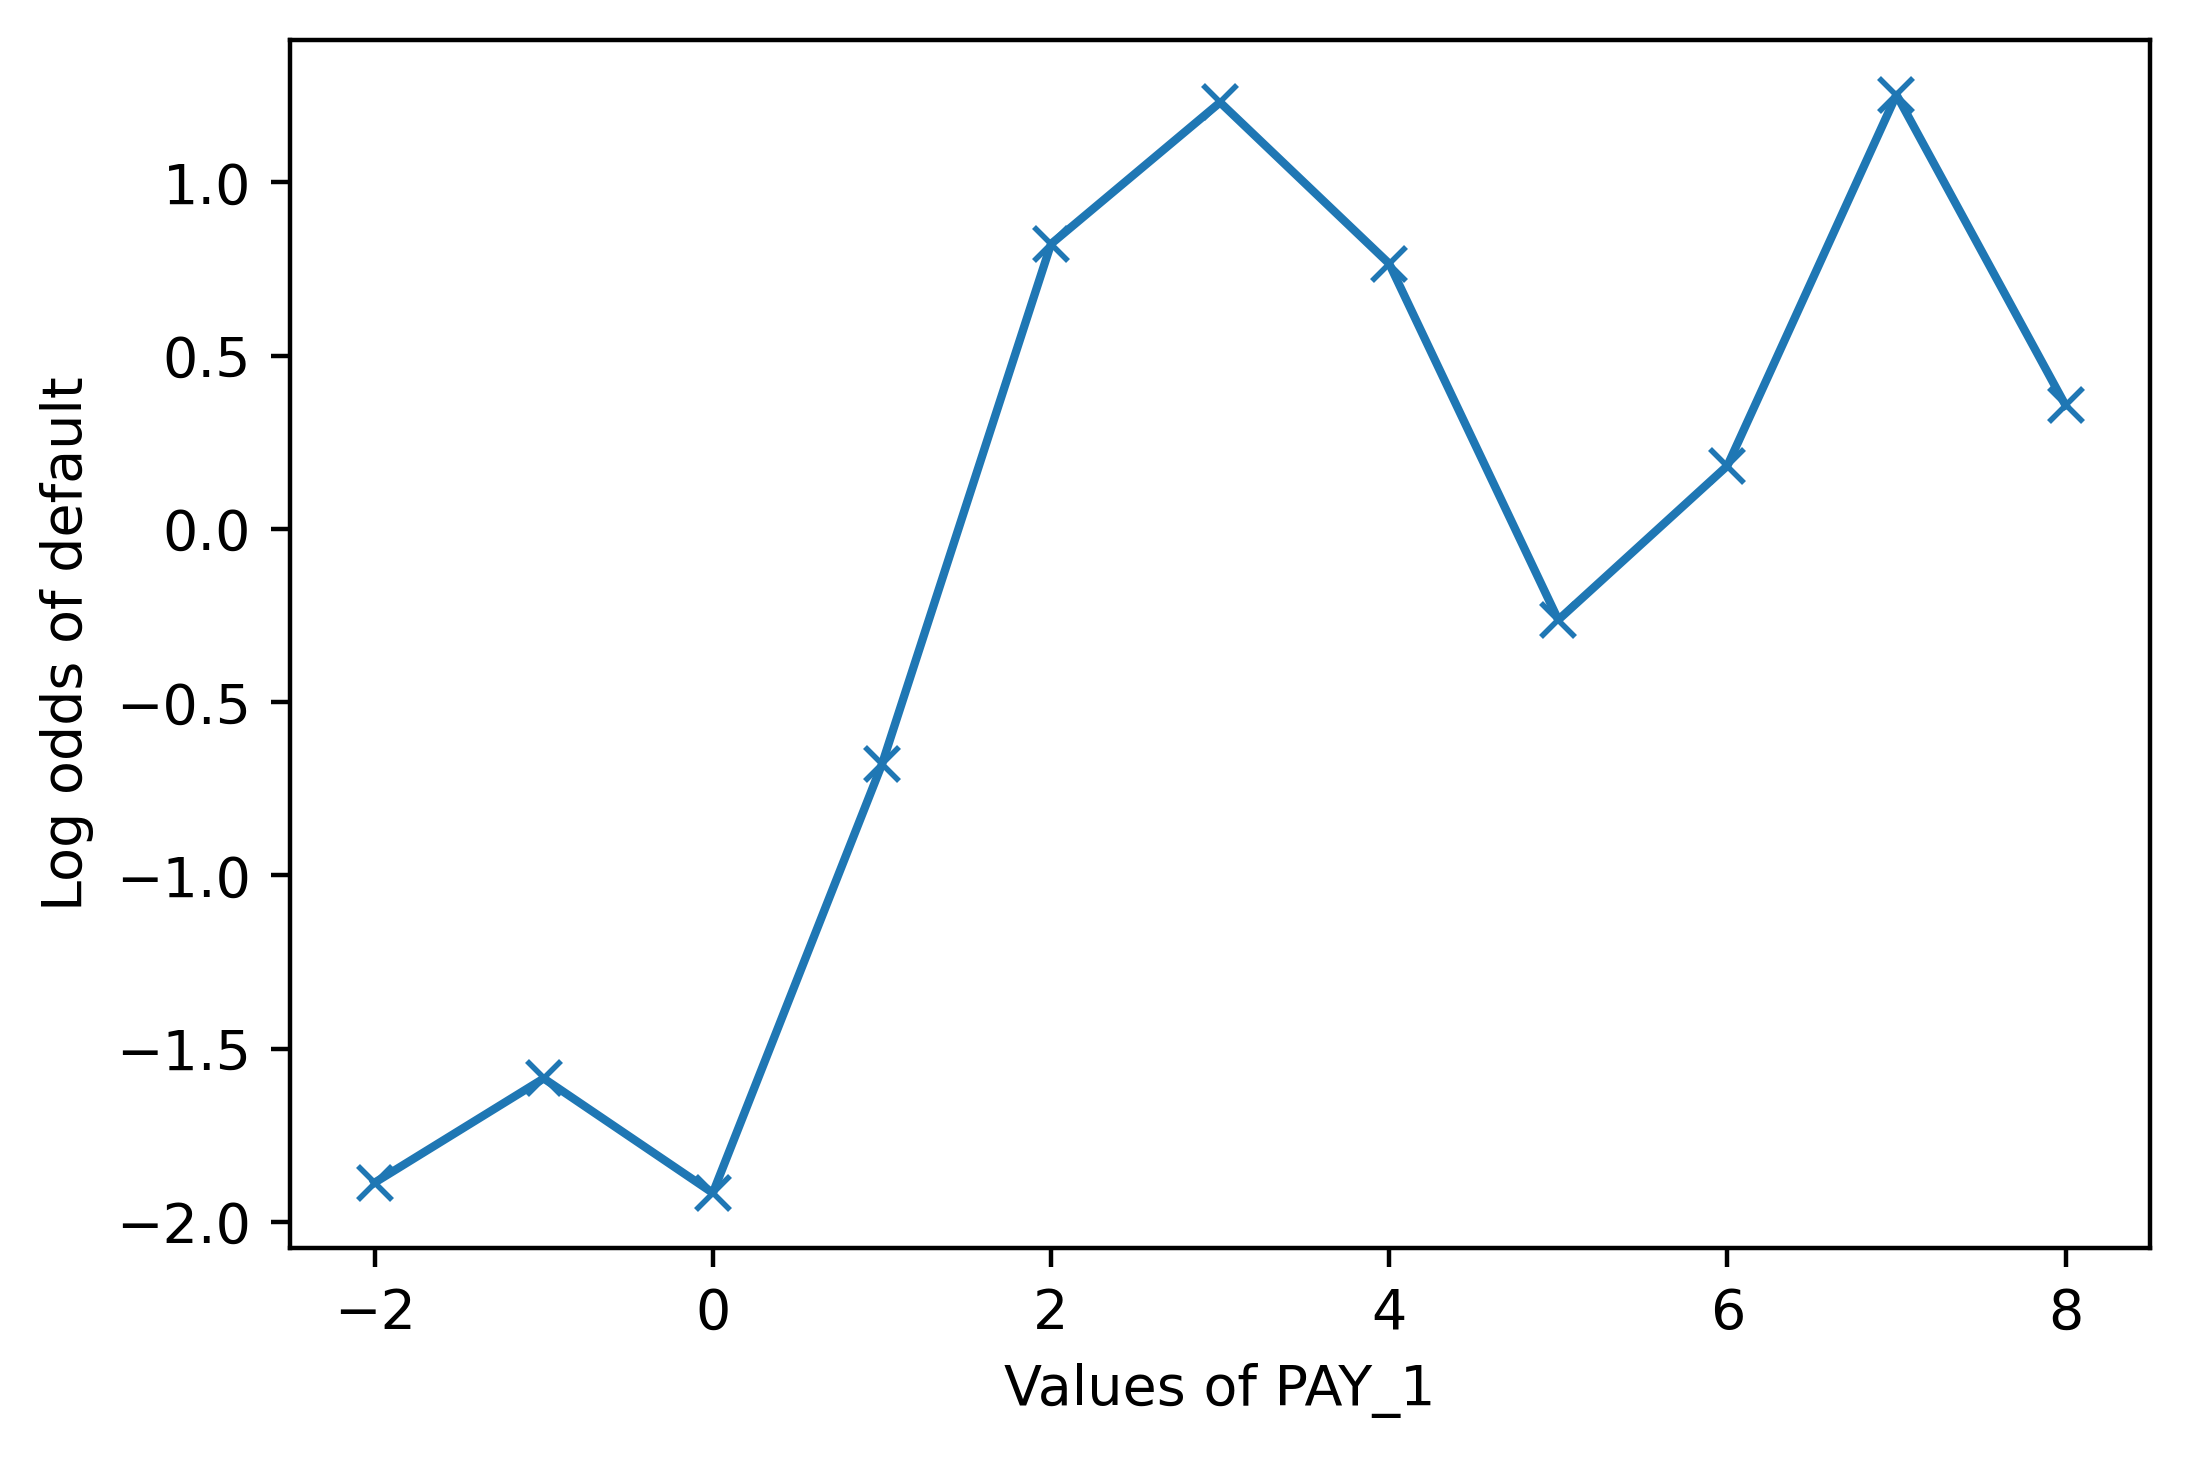

In [26]:
plt.plot(group_by_pay_mean_y.index, log_odds, '-x')
plt.ylabel("Log odds of default")
plt.xlabel("Values of PAY_1")

In [27]:
np.random.seed(seed=6)
X_1_pos = np.random.uniform(low=1, high=7, size=(20,1))
print(X_1_pos[0:3])
X_1_neg = np.random.uniform(low=3, high=10, size=(20,1))
print(X_1_neg[0:3])
X_2_pos = np.random.uniform(low=1, high=7, size=(20,1))
print(X_2_pos[0:3])
X_2_neg = np.random.uniform(low=3, high=10, size=(20,1))
print(X_2_neg[0:3])

[[6.35716091]
 [2.99187883]
 [5.92737474]]
[[3.38132155]
 [8.03046066]
 [8.61519394]]
[[5.4790643 ]
 [5.3444234 ]
 [3.43664678]]
[[9.19684856]
 [9.83587114]
 [8.85836015]]


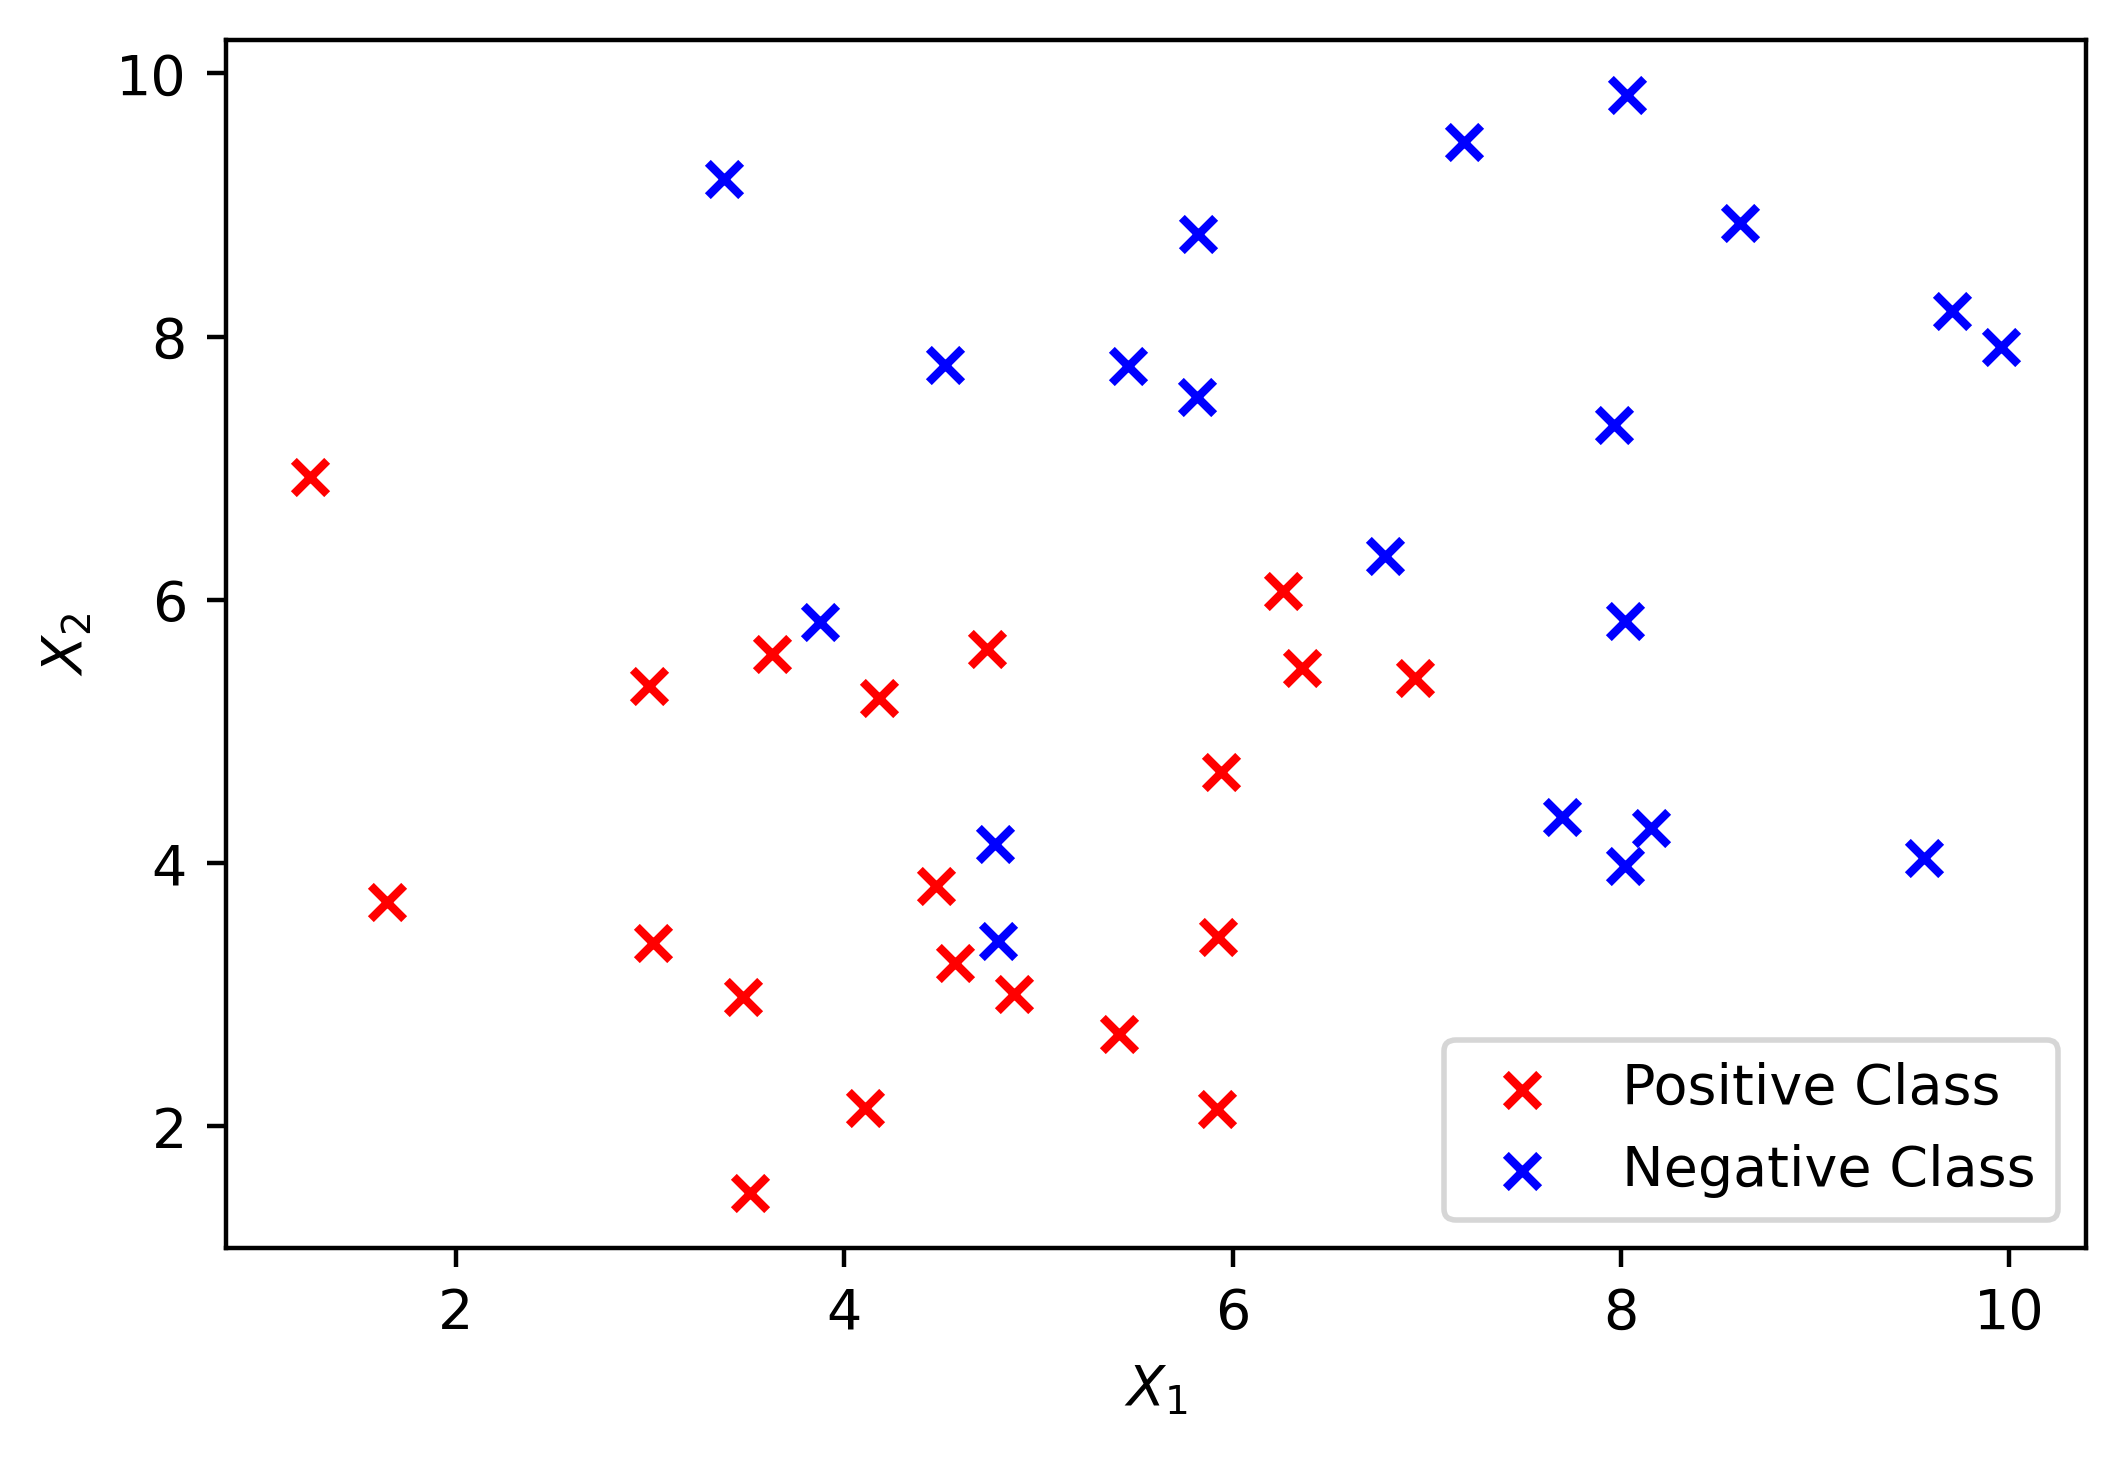

In [28]:
plt.scatter(X_1_pos, X_2_pos, color='red', marker='x')
plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x')
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.legend(['Positive Class', 'Negative Class'])

In [29]:
X = np.block([[X_1_pos, X_2_pos], [X_1_neg, X_2_neg]])
print(X.shape)
print(X[0:3])

(40, 2)
[[6.35716091 5.4790643 ]
 [2.99187883 5.3444234 ]
 [5.92737474 3.43664678]]


In [30]:
#example for understanding row column arrangement in 2-D matrix in python
y = np.block([[1,2],[3,4],[5,6]])
print(Y)

[1 1 0 ... 1 1 1]


In [31]:
y = np.vstack((np.ones((20,1)), np.zeros((20,1)))).reshape(40,)
print(y[0:5])
print(y[-5:])

[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]


In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
example_lr = LogisticRegression(solver='liblinear')
example_lr

LogisticRegression(solver='liblinear')

In [34]:
example_lr.fit(X, y)

LogisticRegression(solver='liblinear')

In [35]:
y_pred = example_lr.predict(X)
positive_indices = [x for x in range(len(y_pred)) if y_pred[x] == 1]
negative_indices = [x for x in range(len(y_pred)) if y_pred[x] == 0]
positive_indices

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 16, 17, 32, 38]

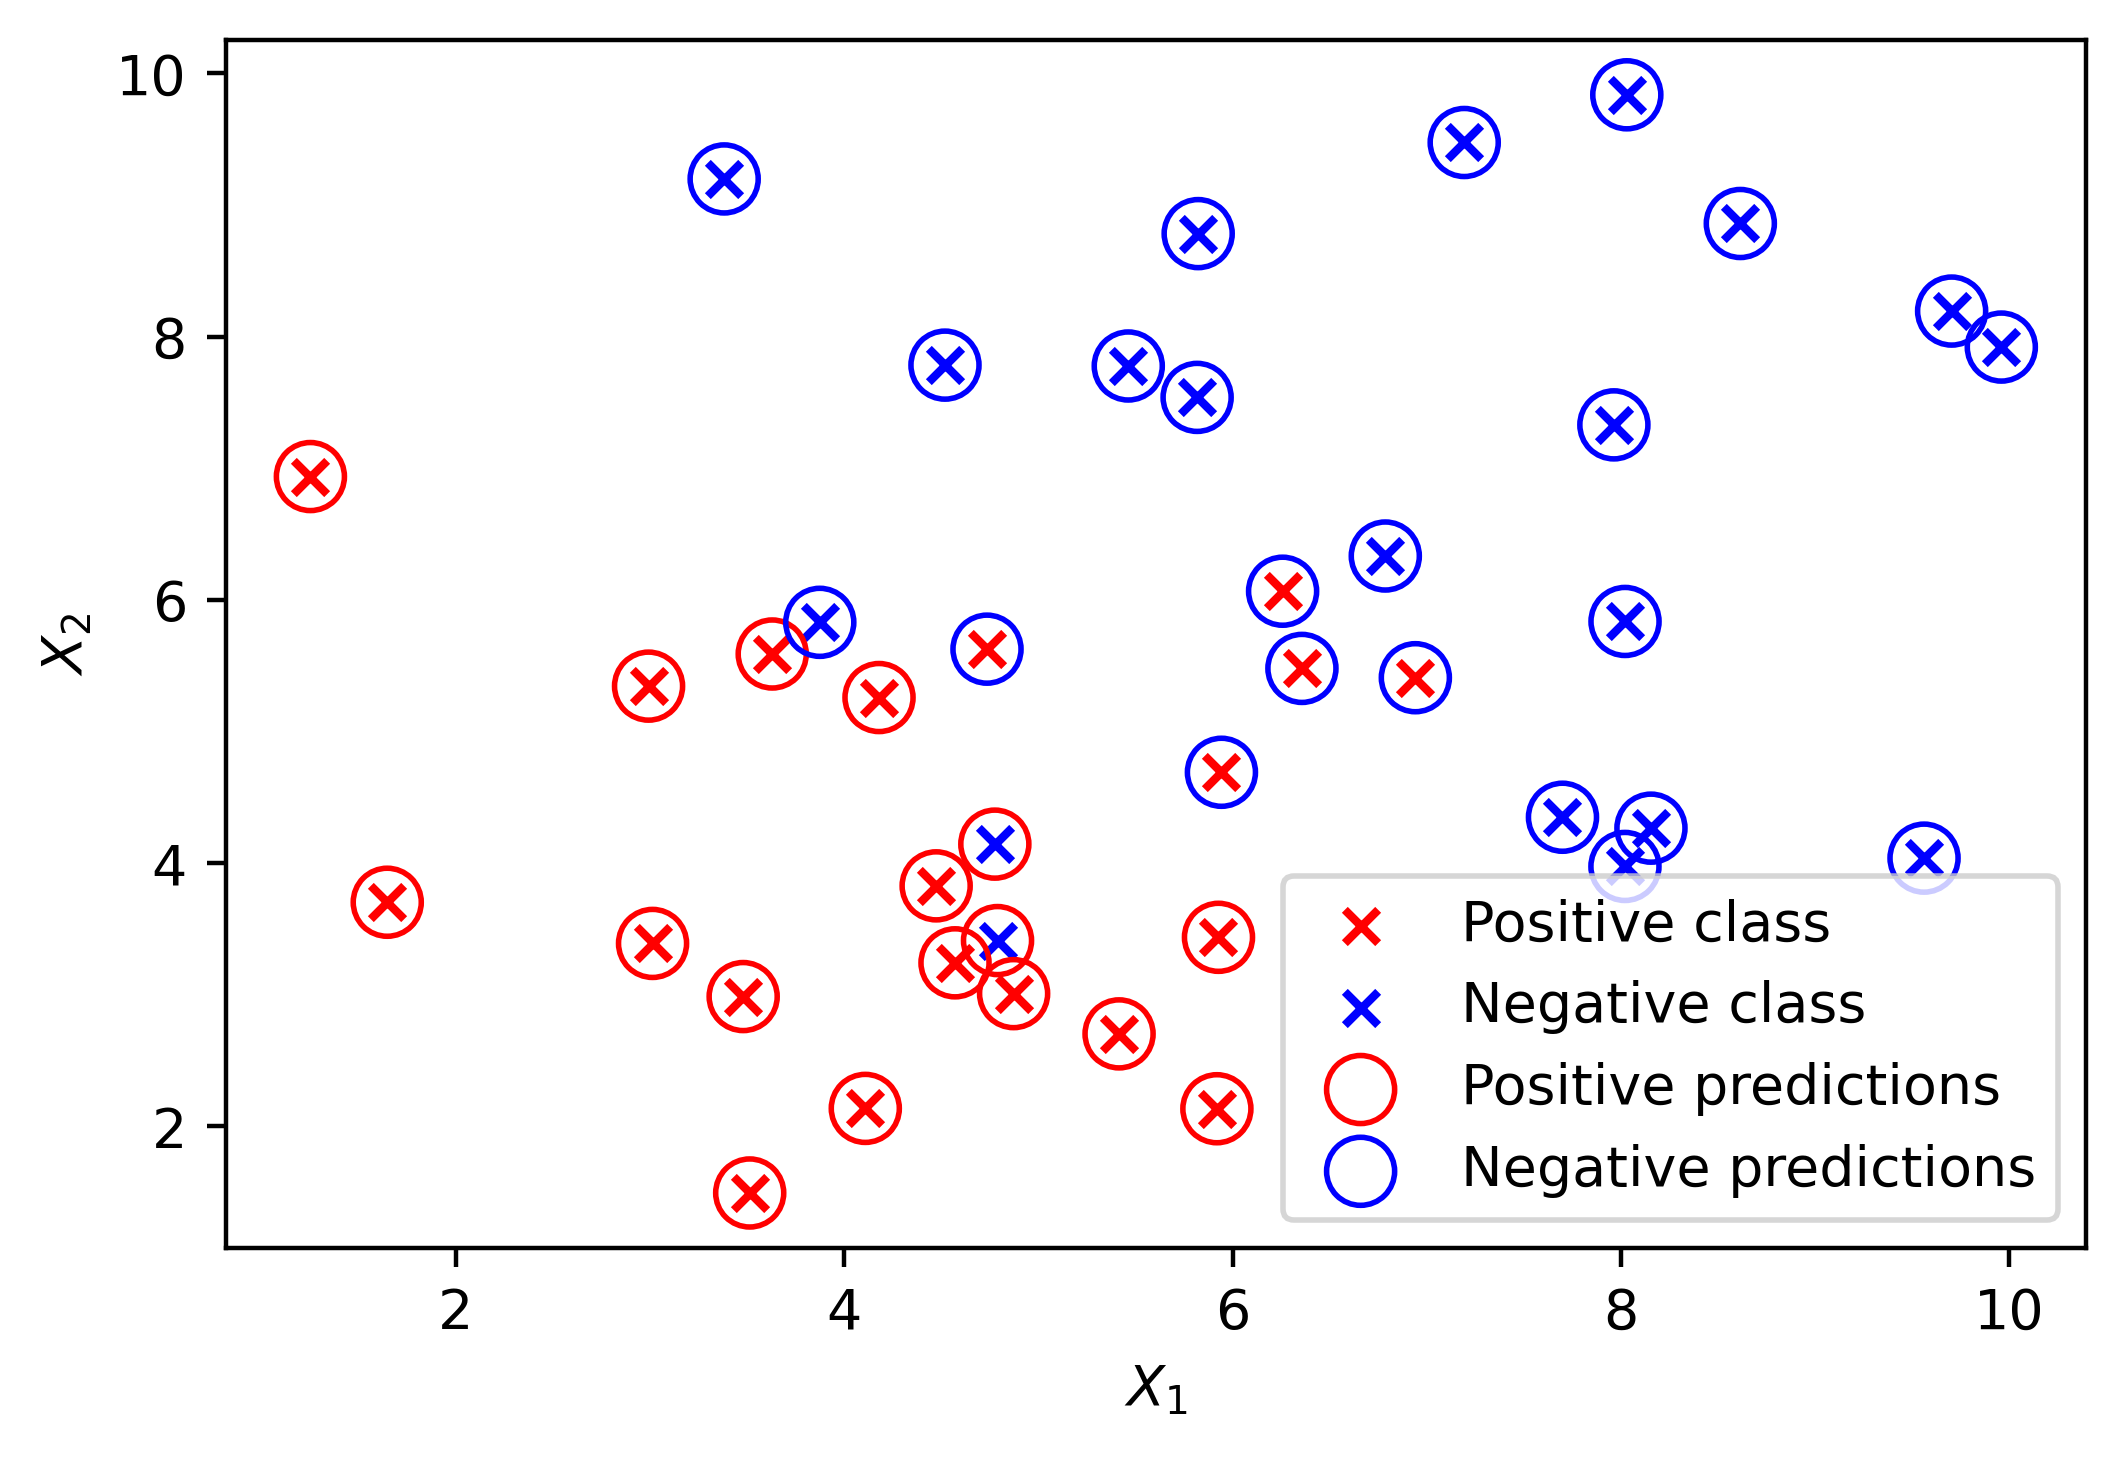

In [36]:
plt.scatter(X_1_pos, X_2_pos, color='red', marker='x')
plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x')
plt.scatter(X[positive_indices,0], X[positive_indices,1], s=150, marker='o',
            edgecolors='red', facecolors='none')
plt.scatter(X[negative_indices,0], X[negative_indices,1], s=150, marker='o',
            edgecolors='blue', facecolors='none')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(['Positive class','Negative class','Positive predictions','Negative predictions'])

In [37]:
theta_1 = example_lr.coef_[0][0]
theta_2 = example_lr.coef_[0][1]
print(theta_1,theta_2)

-0.20245058016285844 -0.25336423626773213


In [38]:
theta_0 = example_lr.intercept_
print(theta_0)

[2.25479161]


In [39]:
X_1_decision_boundary = np.array([0,10])
X_2_decision_boundary = -(theta_1/theta_2)*X_1_decision_boundary - (theta_0/theta_2)

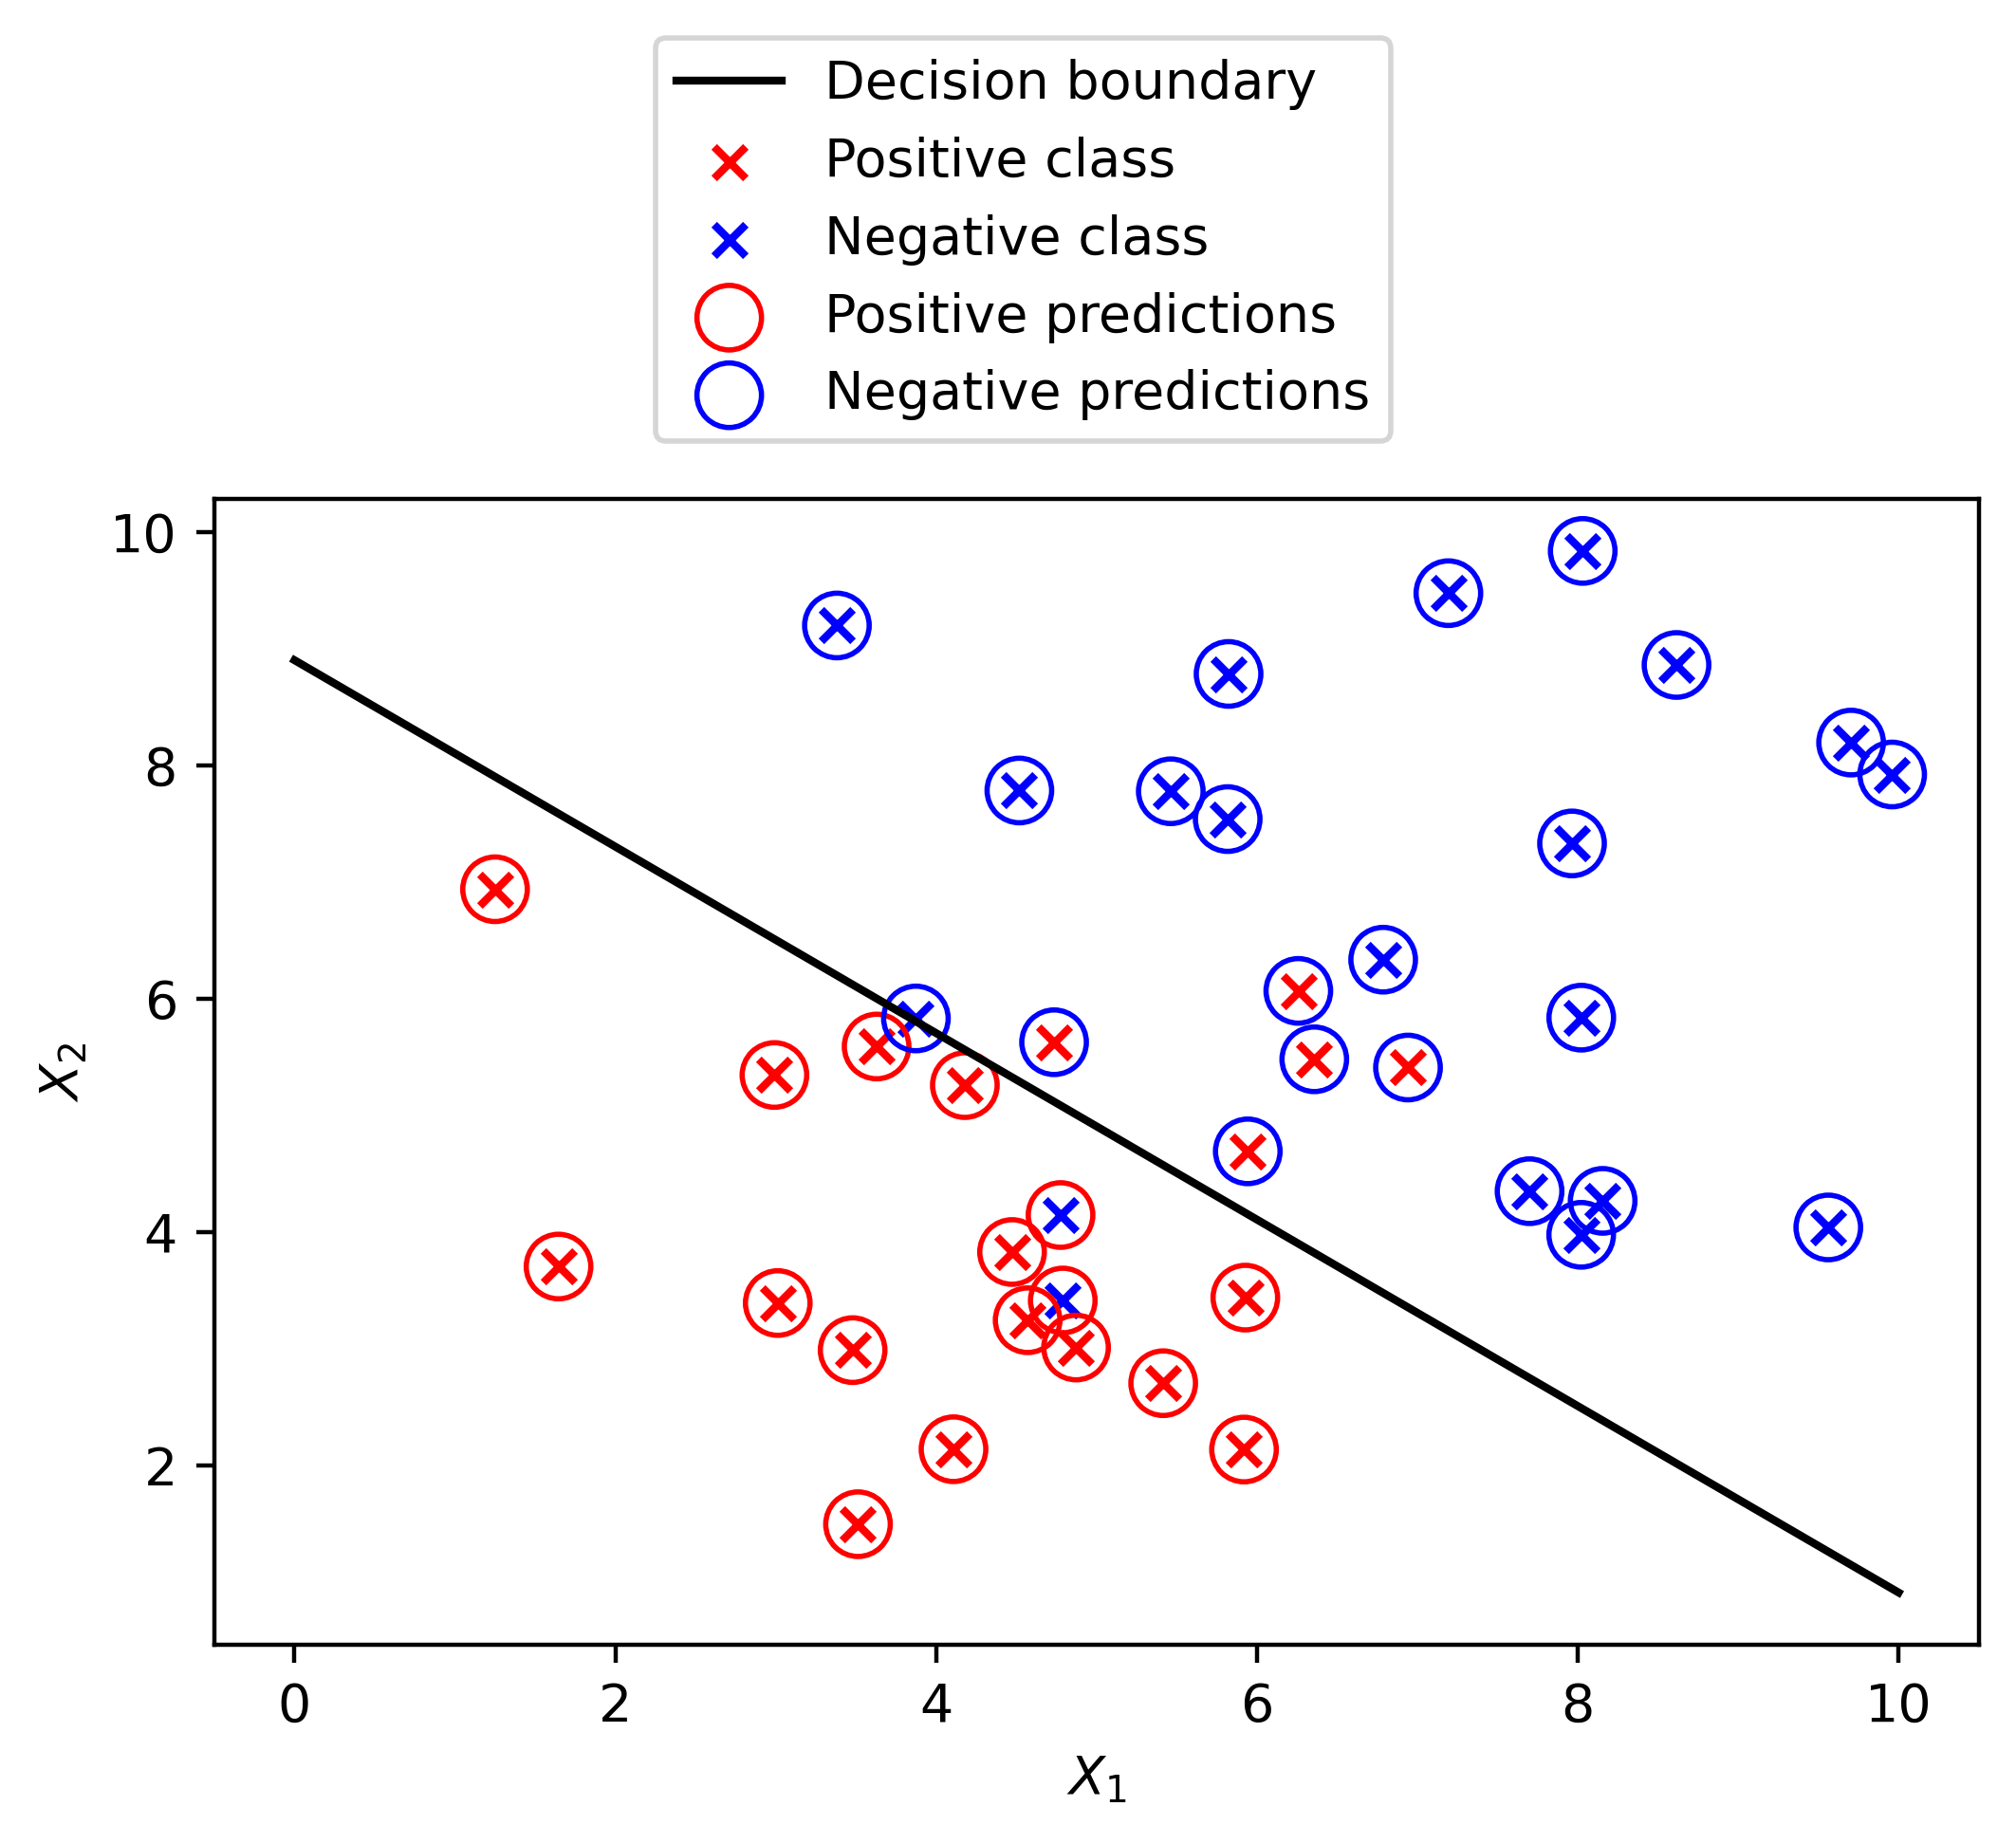

In [40]:
plt.scatter(X_1_pos, X_2_pos, color='red', marker='x', label='Positive class')
plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x', label='Negative class')
plt.scatter(X[positive_indices,0], X[positive_indices,1], s=150, marker='o',
            edgecolors='red', facecolors='none', label='Positive predictions')
plt.scatter(X[negative_indices,0], X[negative_indices,1], s=150, marker='o',
            edgecolors='blue', facecolors='none', label='Negative predictions')
dec = plt.plot(X_1_decision_boundary, X_2_decision_boundary, '-k', label='Decision boundary')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(loc=[0.25,1.05])

## Fitting a Logistic Regression model and directly using the coefficients

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df[['PAY_1','LIMIT_BAL']].values,
df['default payment next month'].values, test_size =0.2, random_state=24)

In [43]:
print(X_train.shape)
print(X_test.shape)

(21331, 2)
(5333, 2)


In [44]:
lr_model = LogisticRegression(solver='liblinear')

In [45]:
lr_model

LogisticRegression(solver='liblinear')

In [46]:
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
y_pred_proba  = lr_model.predict_proba(X_test)
y_pred_proba

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393435, 0.33606565]])

In [48]:
print(lr_model.coef_ , lr_model.intercept_)

[[ 8.27451187e-11 -6.80876727e-06]] [-6.57647457e-11]


In [49]:
np.ones((X_test.shape[0],1)).shape

(5333, 1)

## Gradient Descent Procedure

In [50]:
X_poly = np.linspace(-3, 5, 81)
print(X_poly[0:5],'....',X_poly[-5:])

[-3.  -2.9 -2.8 -2.7 -2.6] .... [4.6 4.7 4.8 4.9 5. ]


In [51]:
def cost_function(X):
    return X*(X-2)

Text(0.5, 1.0, 'Error surface')

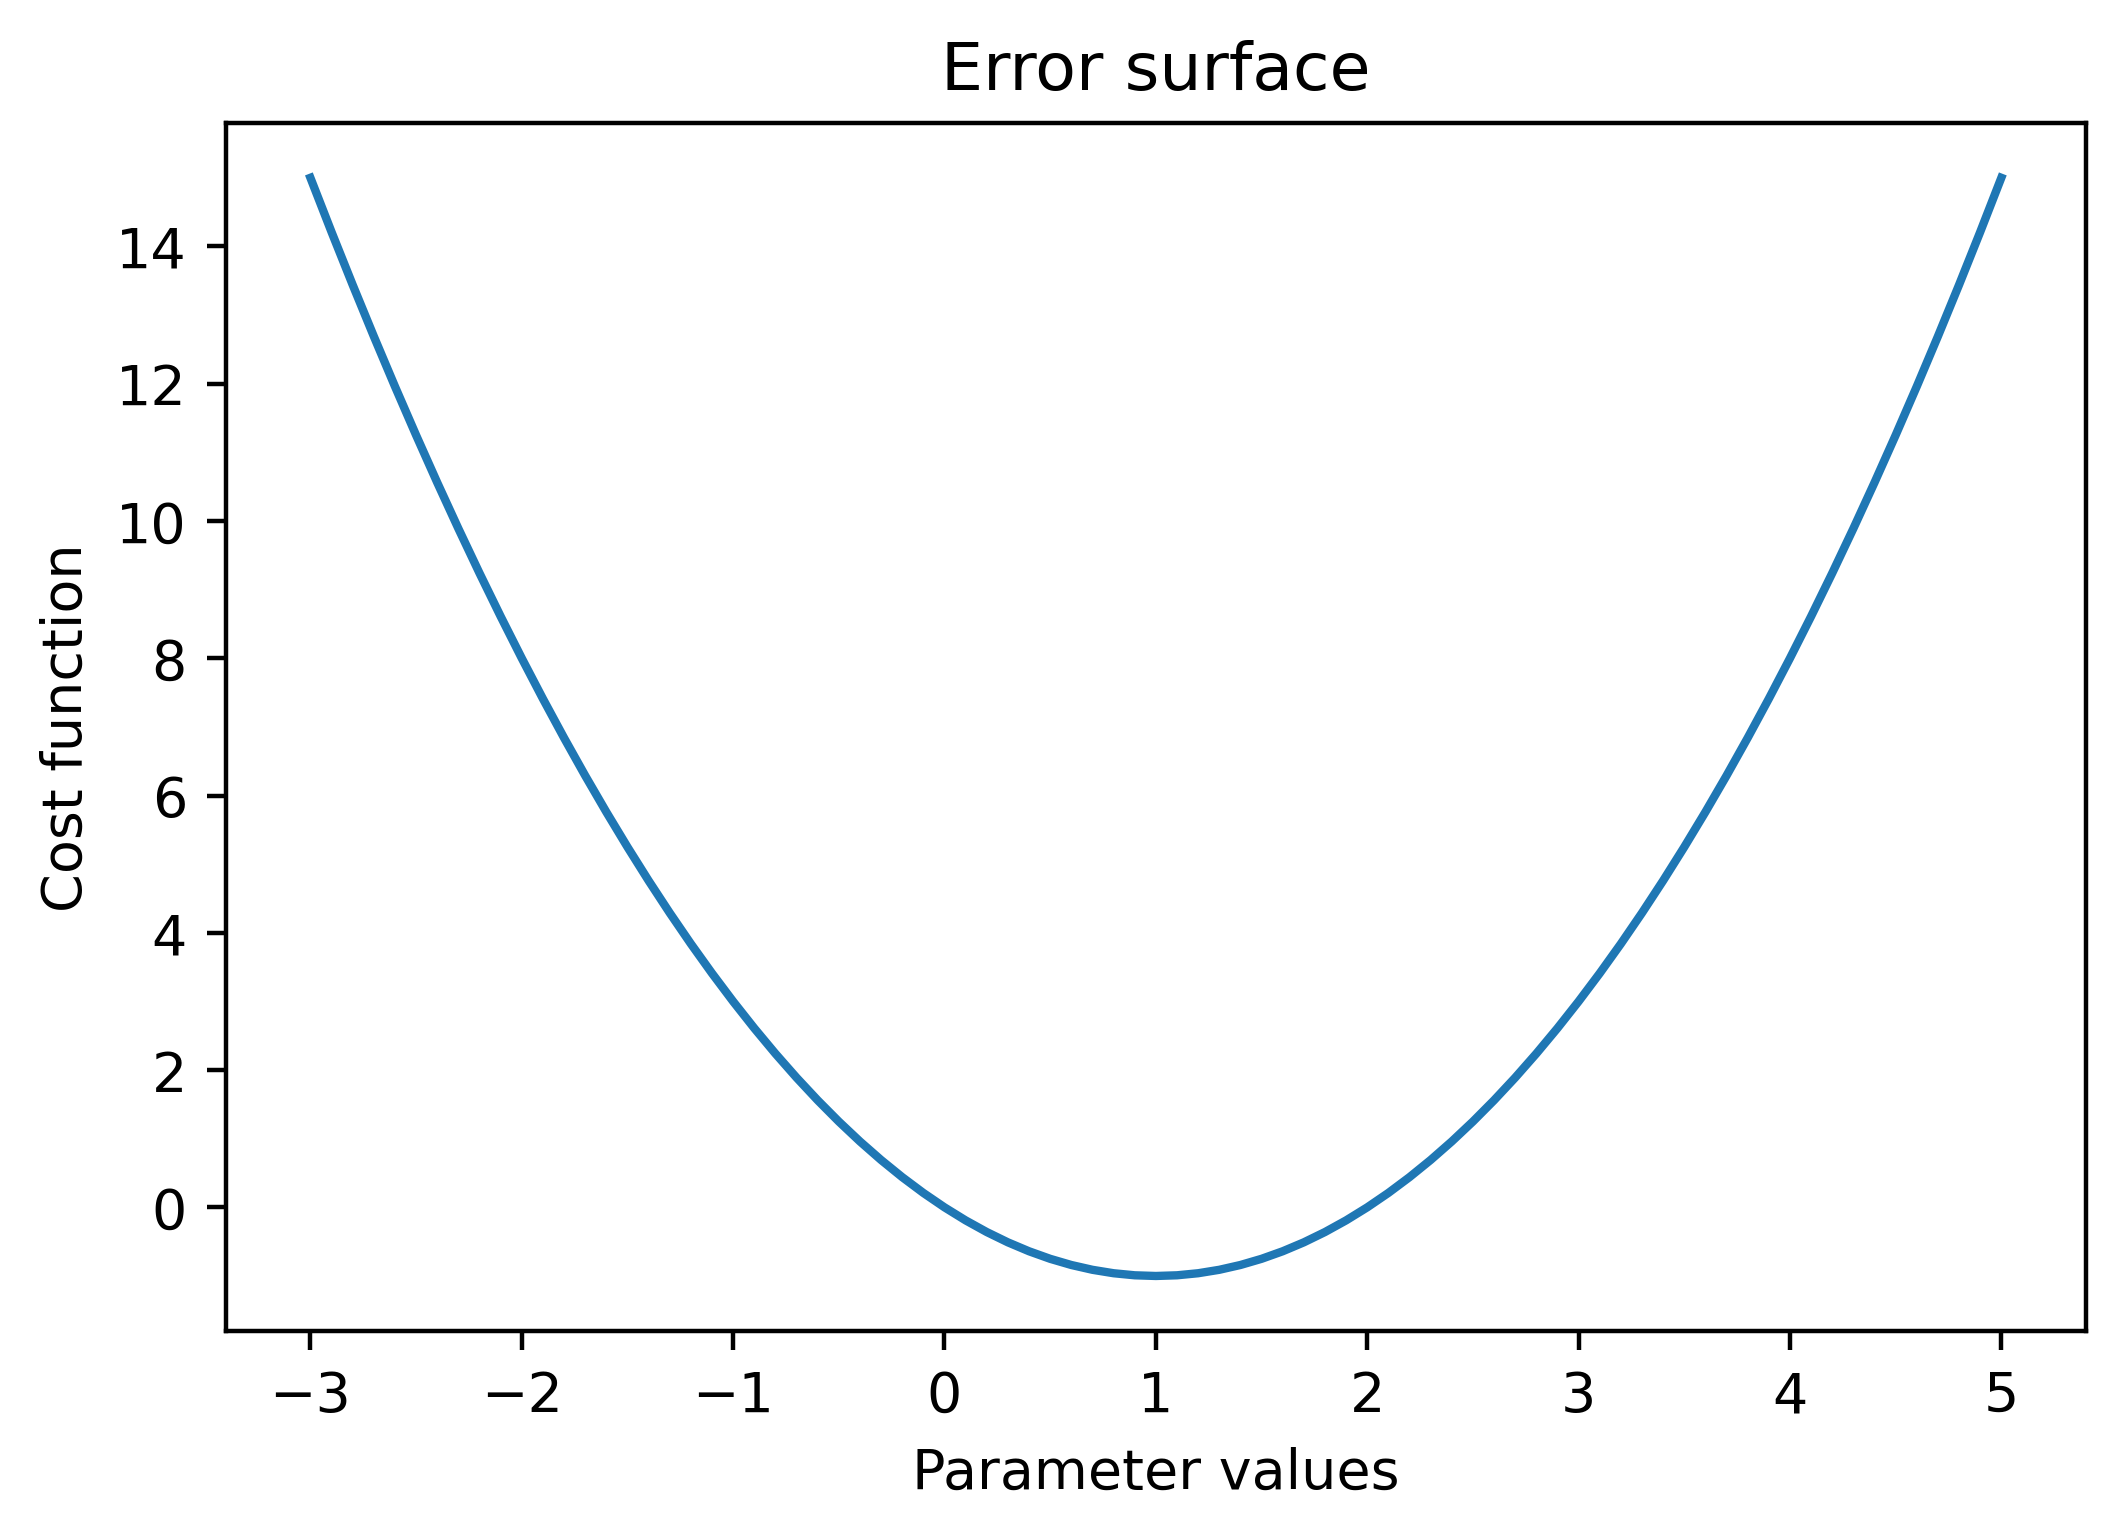

In [52]:
y_poly = cost_function(X_poly)
plt.plot(X_poly, y_poly)
plt.xlabel("Parameter values")
plt.ylabel("Cost function")
plt.title("Error surface")

In [53]:
def gradient(X):
    return (X*2)-2
x_start = 4.5
learning_rate = 0.75
x_next = x_start - gradient(x_start)*learning_rate
x_next

-0.75

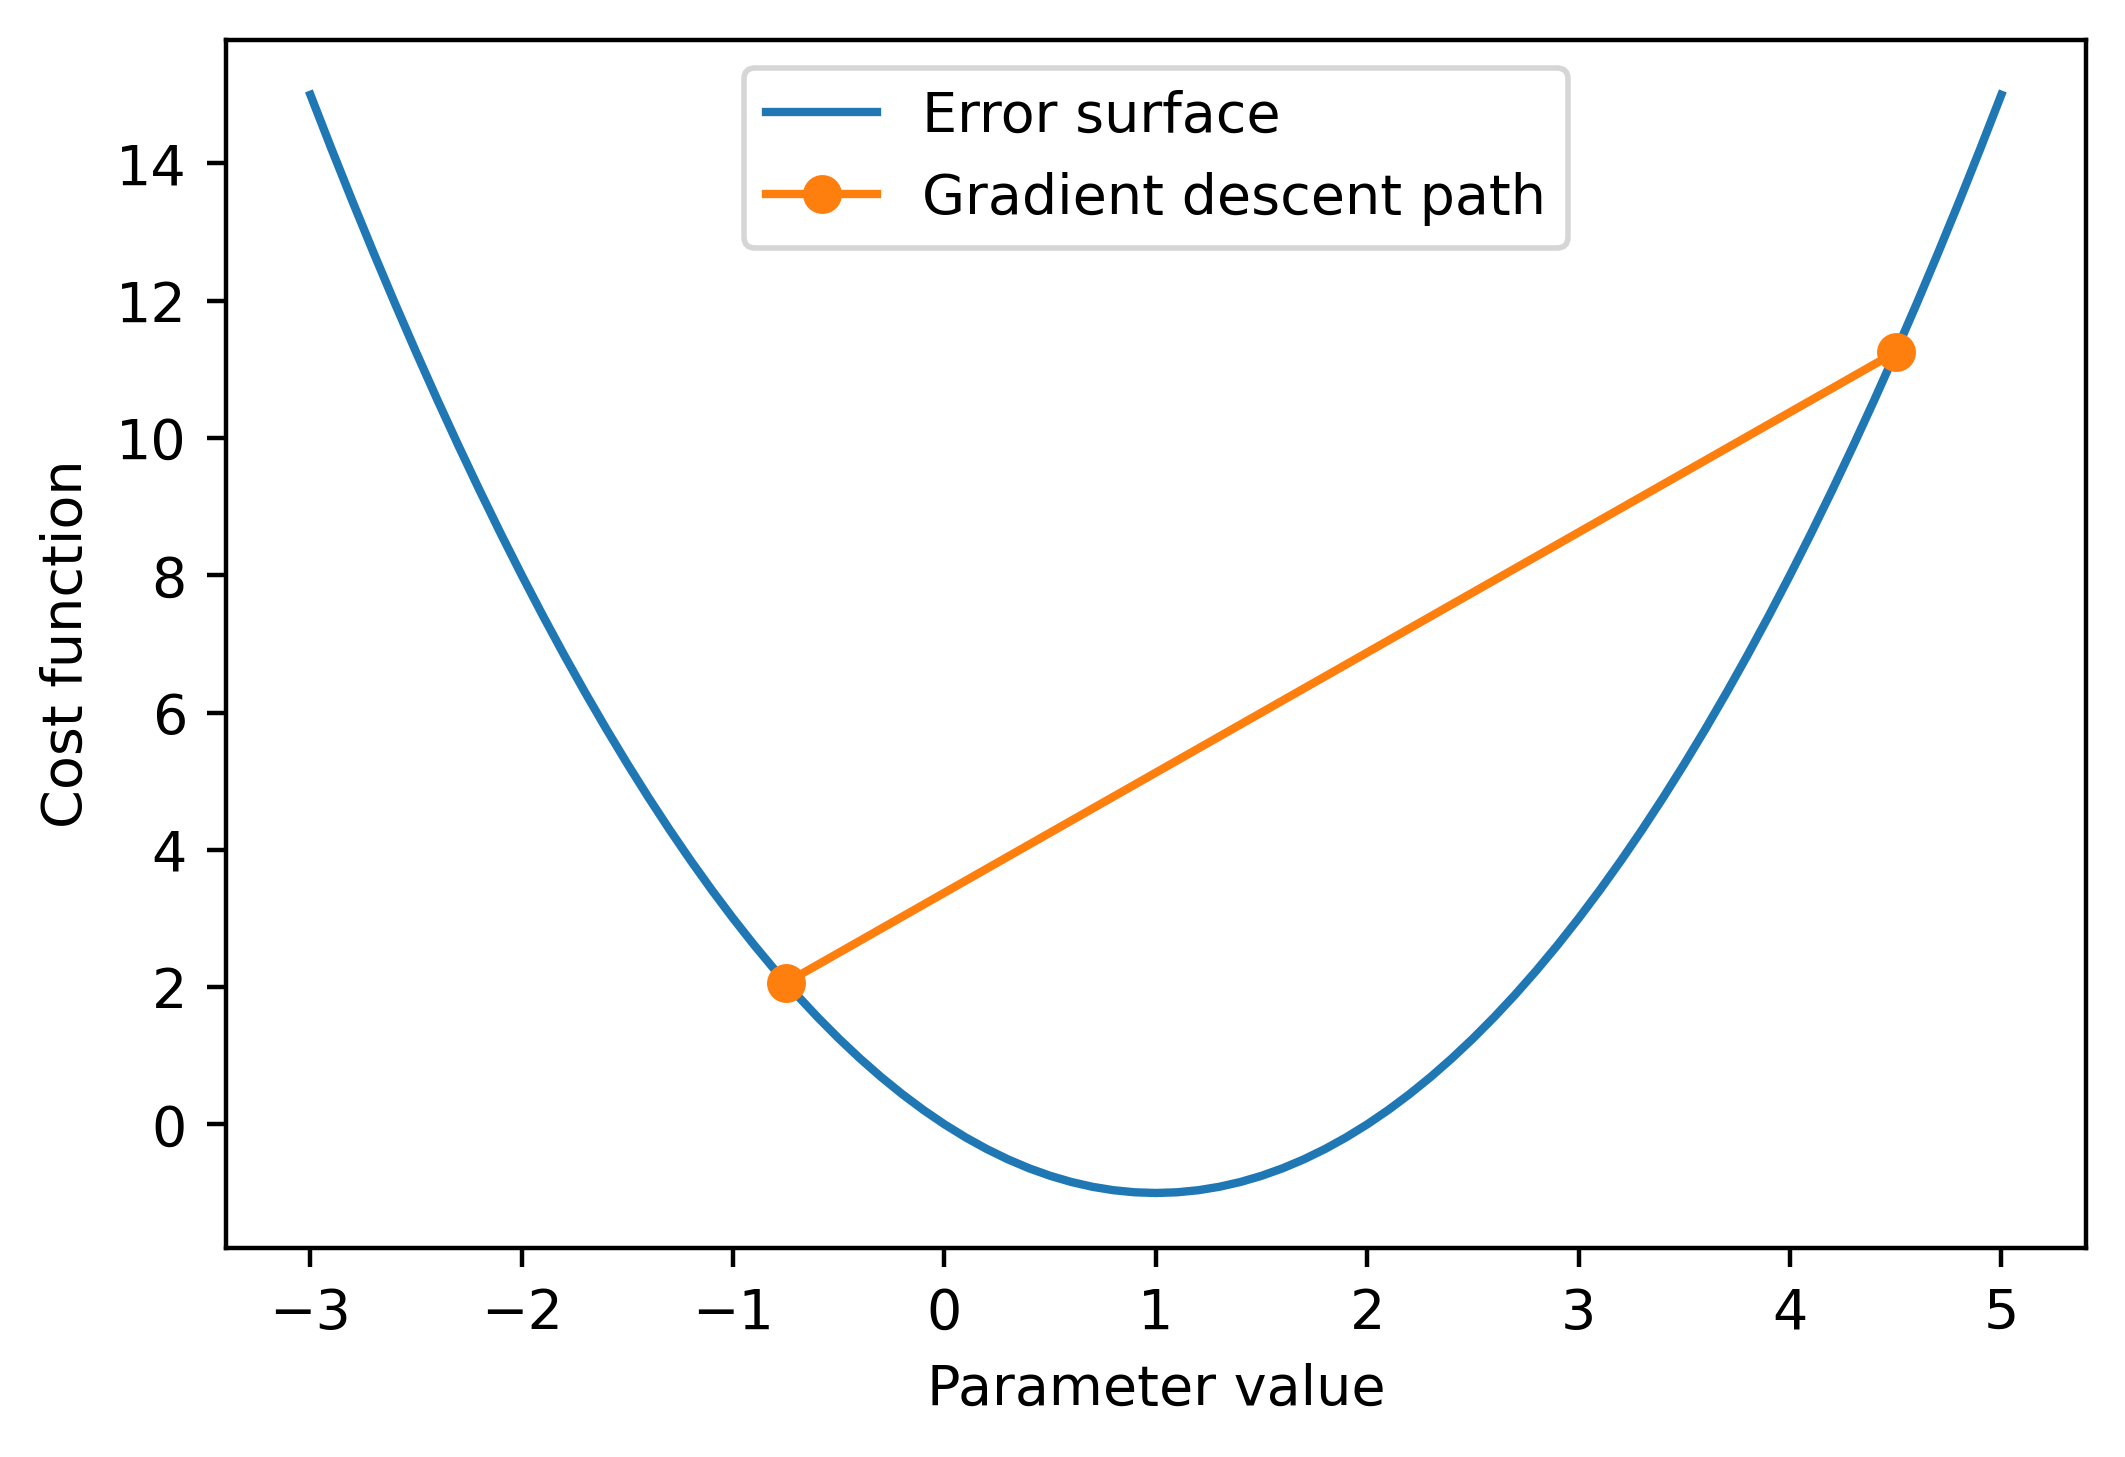

In [54]:
plt.plot(X_poly, y_poly)
plt.plot([x_start, x_next], [cost_function(x_start), cost_function(x_next)], '-o')
plt.xlabel('Parameter value')
plt.ylabel('Cost function')
plt.legend(['Error surface','Gradient descent path'])

In [55]:
iterations = 15
x_path = np.empty(iterations,)
x_path[0] = x_start
for iteration_count in range(1, iterations):
    derivative = gradient(x_path[iteration_count-1])
    x_path[iteration_count]= x_path[iteration_count-1]-(derivative*learning_rate)
x_path

array([ 4.5       , -0.75      ,  1.875     ,  0.5625    ,  1.21875   ,
        0.890625  ,  1.0546875 ,  0.97265625,  1.01367188,  0.99316406,
        1.00341797,  0.99829102,  1.00085449,  0.99957275,  1.00021362])

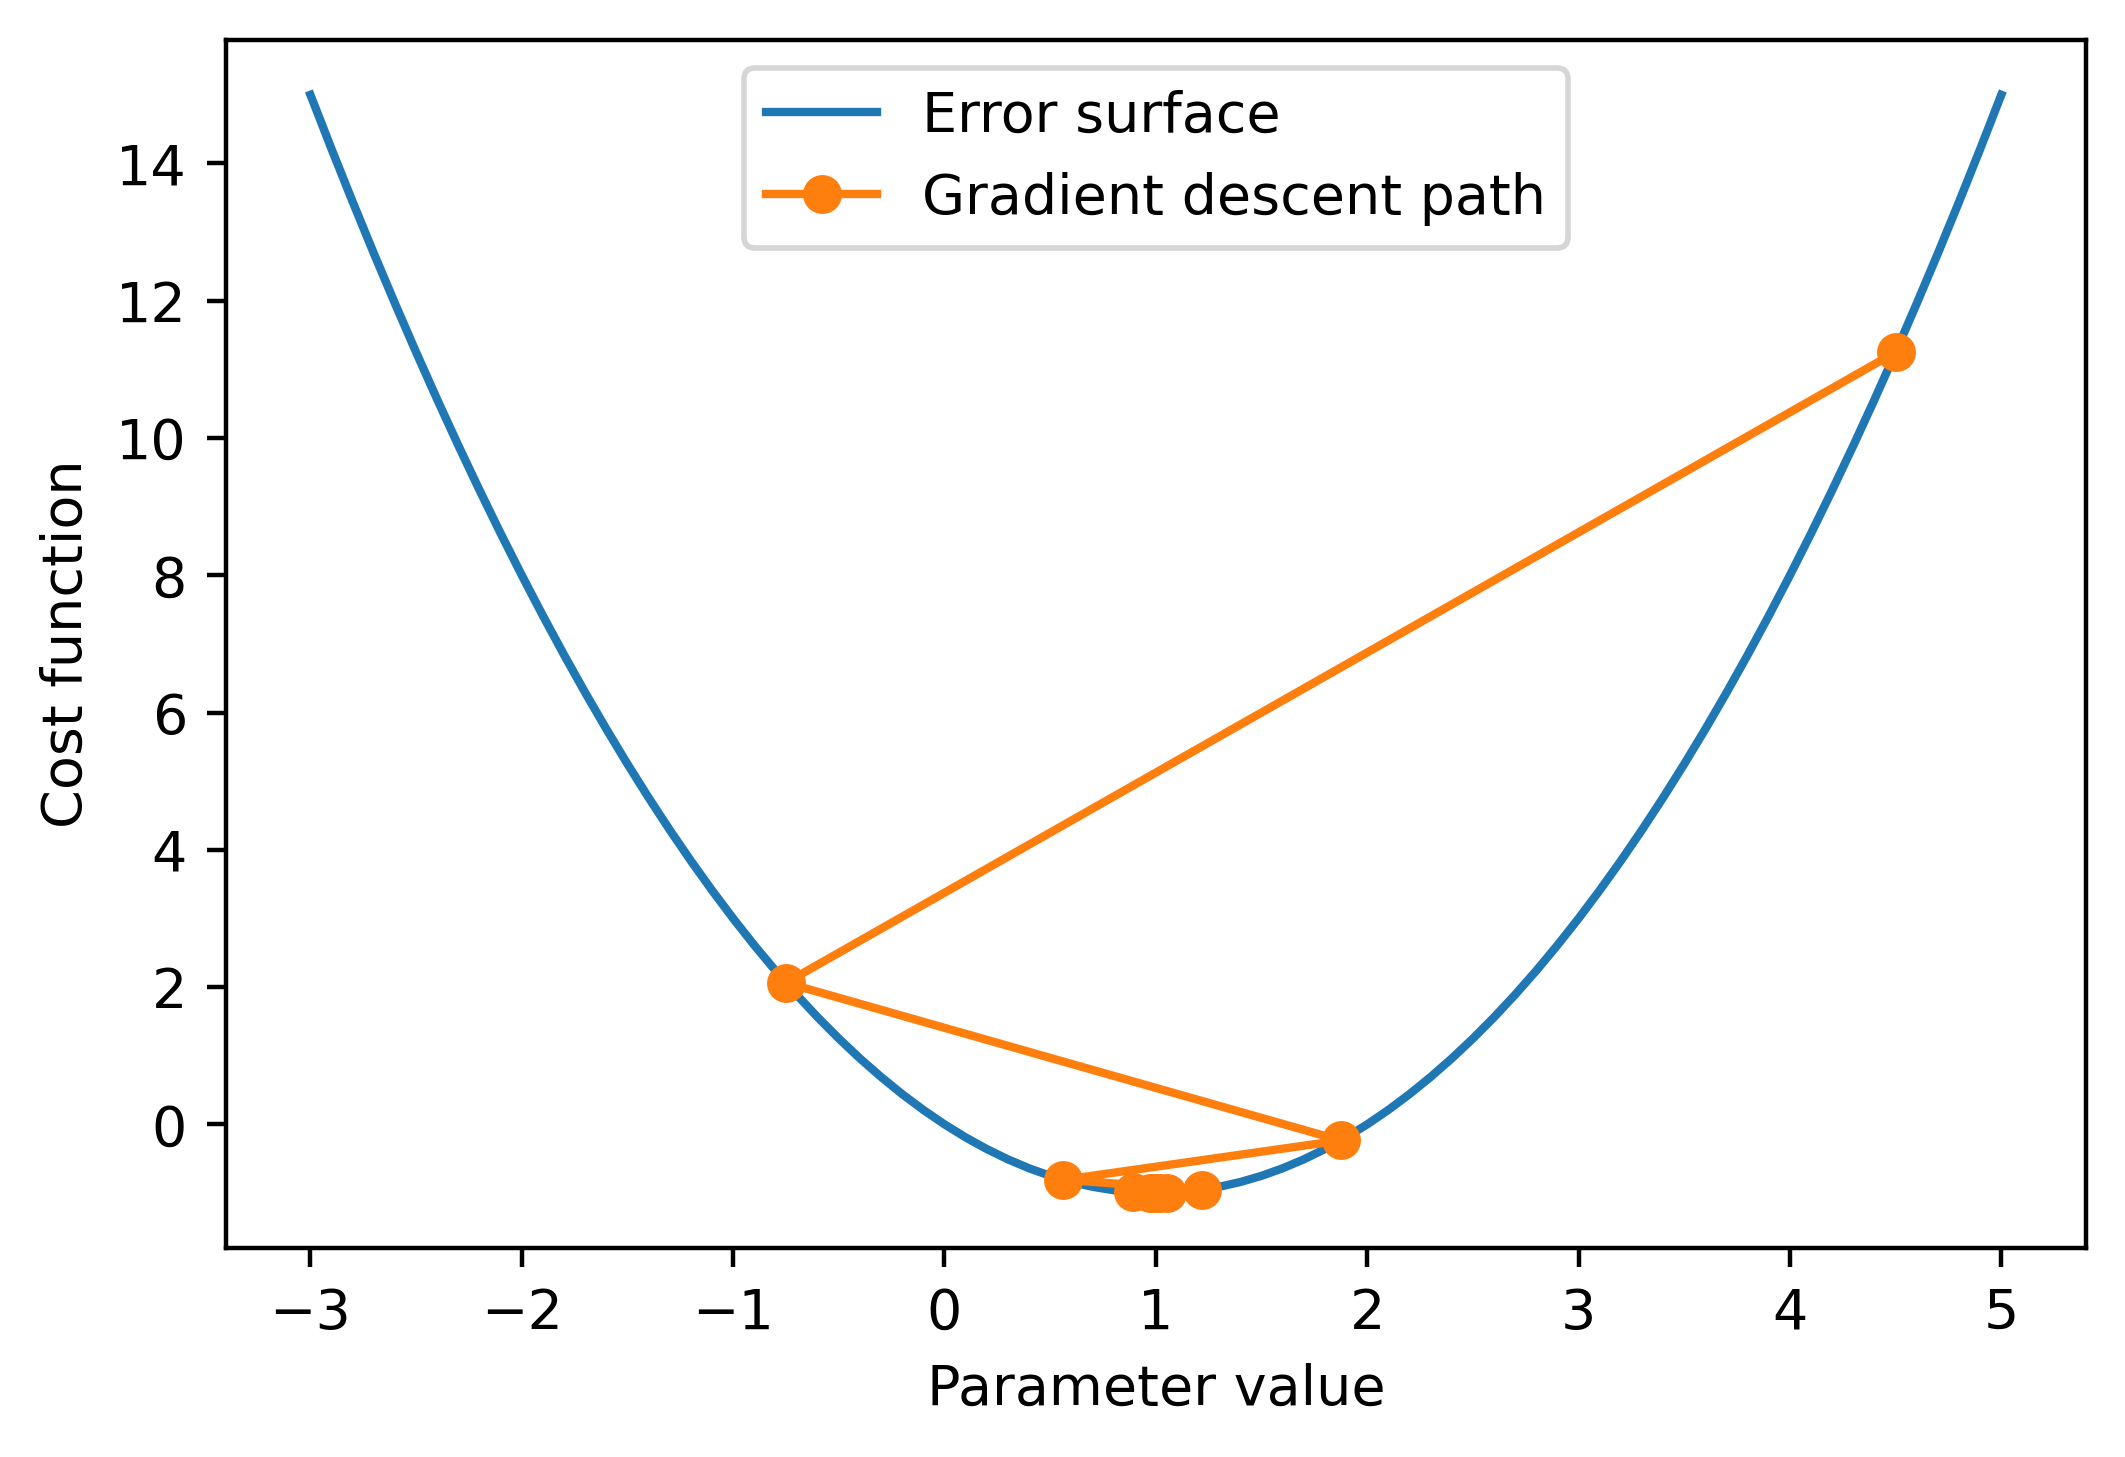

In [56]:
plt.plot(X_poly, y_poly)
plt.plot(x_path,cost_function(x_path), '-o')
plt.xlabel('Parameter value')
plt.ylabel('Cost function')
plt.legend(['Error surface','Gradient descent path'])

In [57]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [58]:
X_synthetic, y_synthetic = \
make_classification(n_samples=1000, n_features=200, n_informative=3, n_redundant=10,
n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=0.8, hypercube=True, shift=0.0,
scale=1.0, shuffle=True, random_state=24)

In [59]:
print(X_synthetic.shape, y_synthetic.shape)

(1000, 200) (1000,)


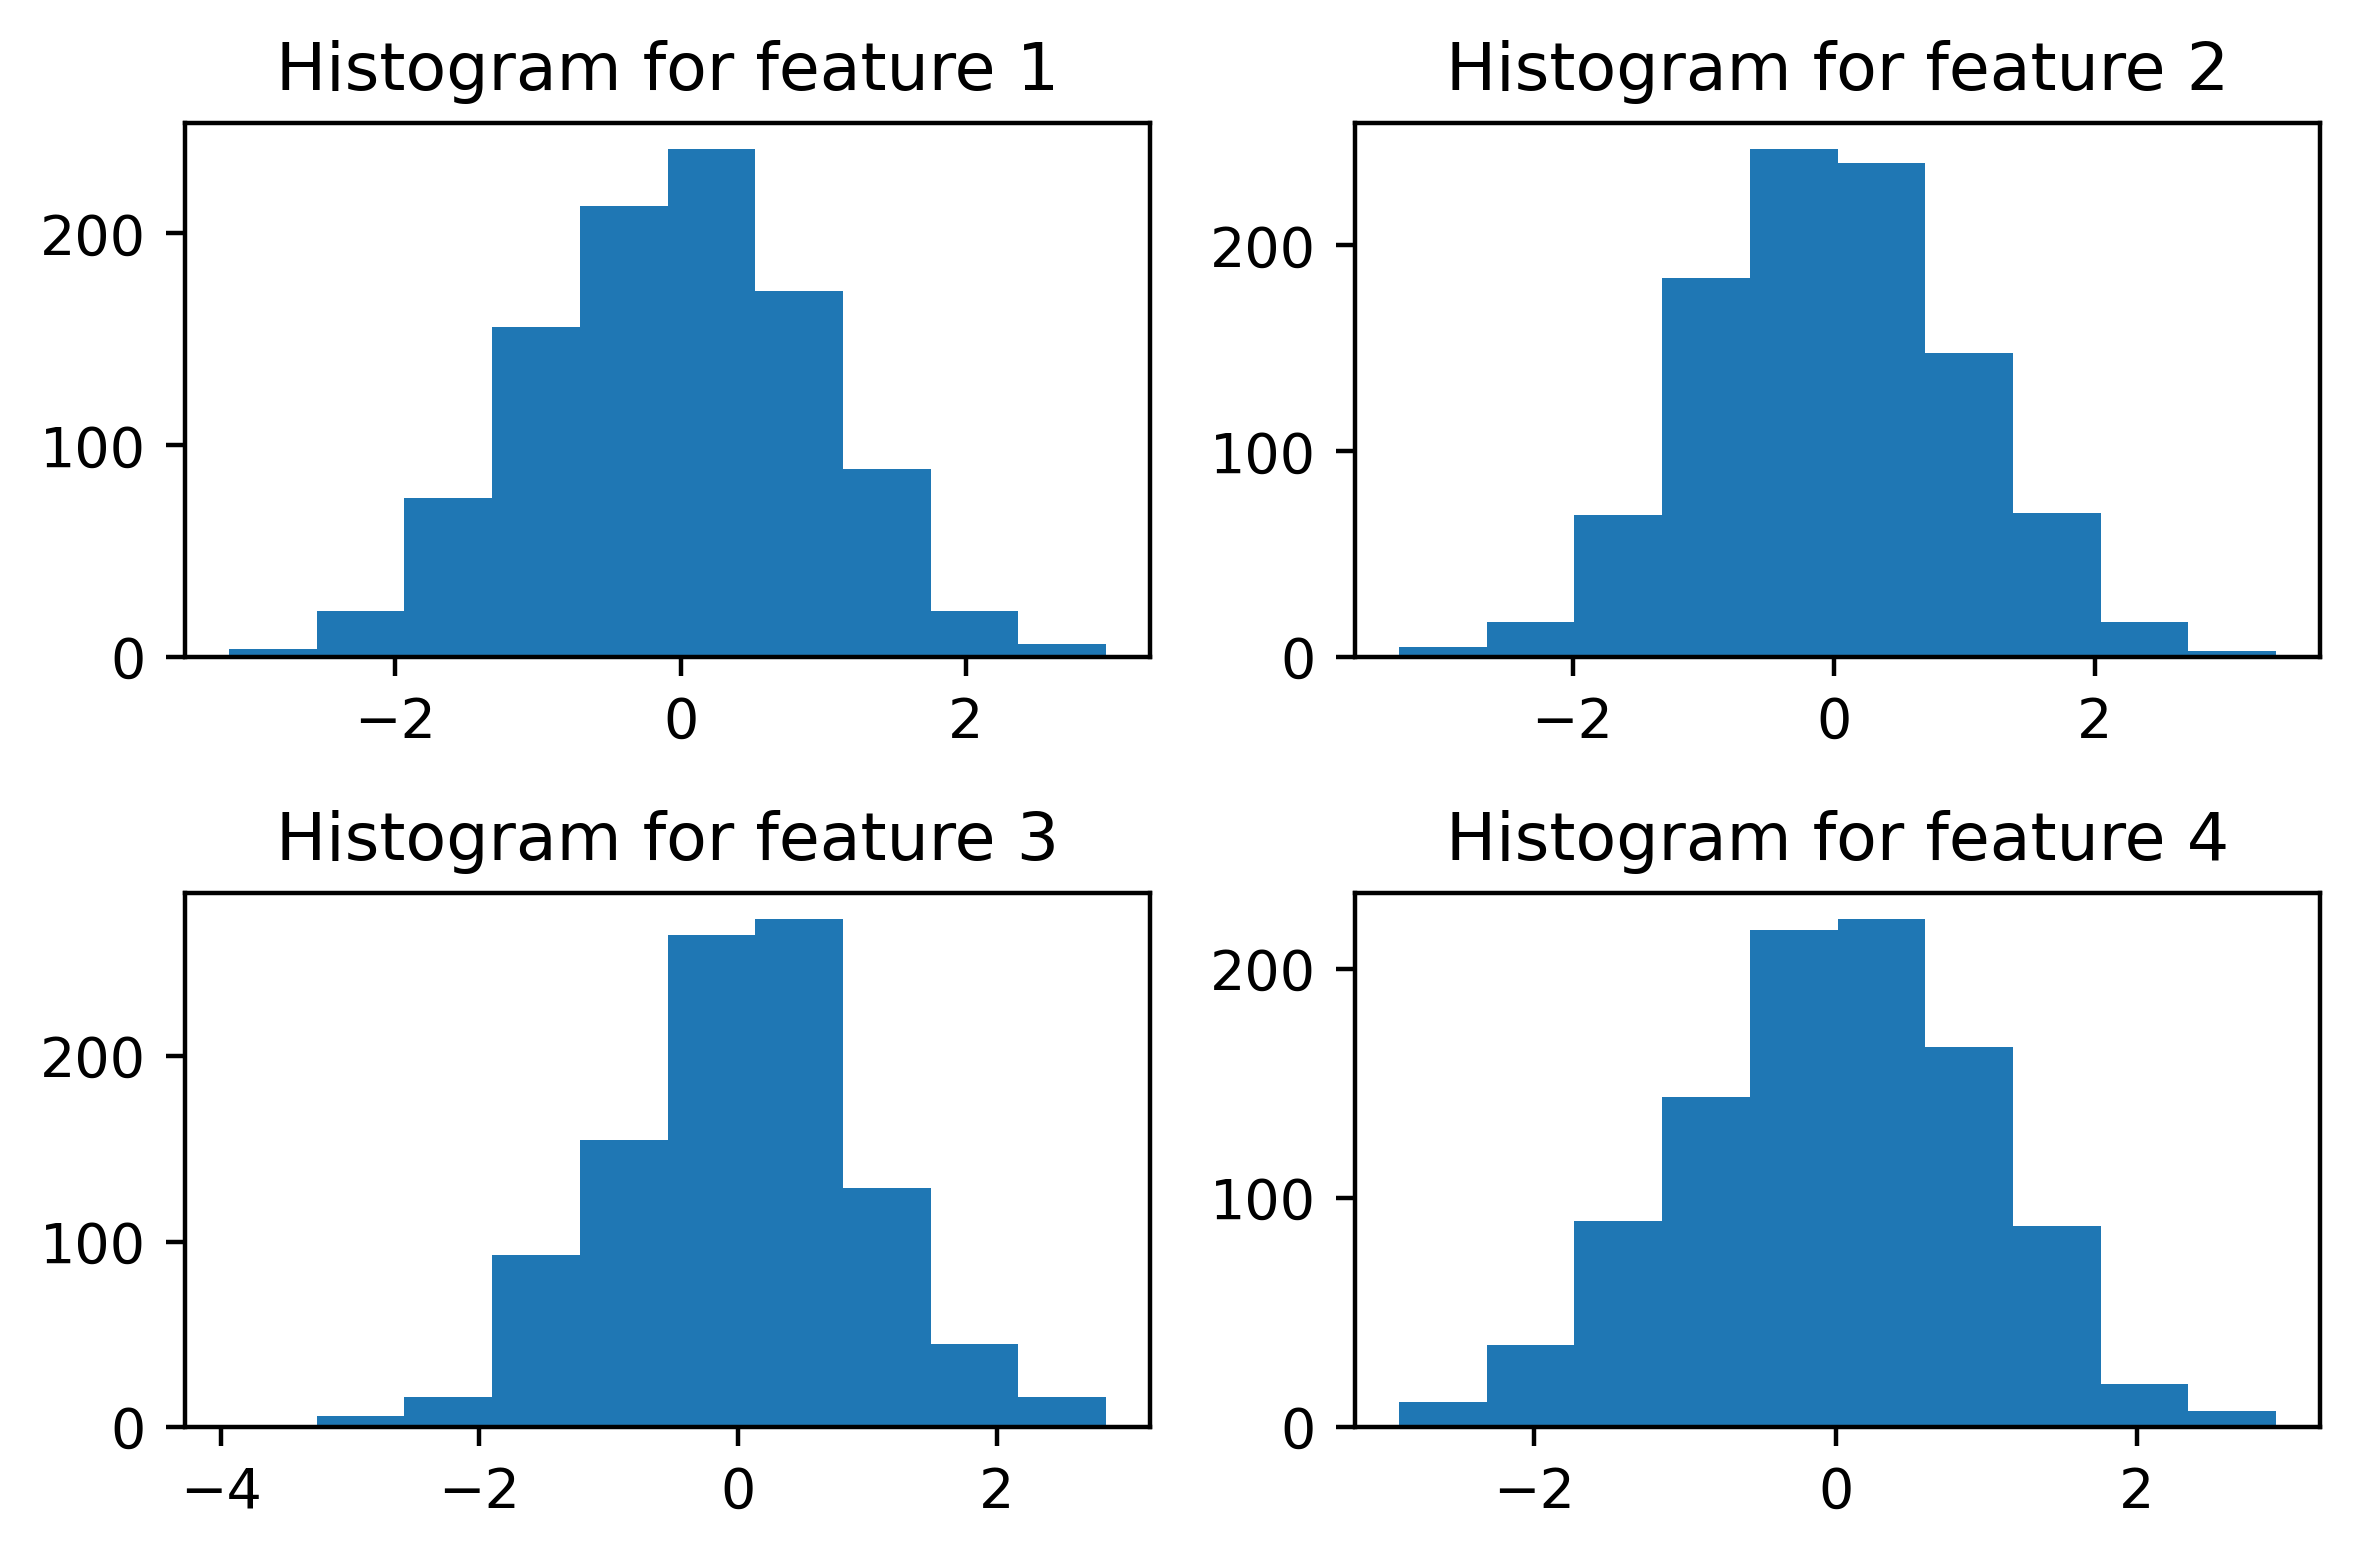

In [60]:
for plot_index in range(4):
    plt.subplot(2,2,plot_index + 1)
    plt.hist(X_synthetic[:,plot_index])
    plt.title("Histogram for feature {}".format(plot_index +1))
    plt.tight_layout()

In [61]:
X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(
X_synthetic, y_synthetic,
test_size=0.2, random_state=24)
lr_syn= \
LogisticRegression(solver='liblinear', penalty='l1', C=1000, random_state=1)
lr_syn.fit(X_syn_train, y_syn_train)

LogisticRegression(C=1000, penalty='l1', random_state=1, solver='liblinear')

In [62]:
y_syn_train_predict_proba = lr_syn.predict_proba(X_syn_train)
roc_auc_score(y_syn_train, y_syn_train_predict_proba[:,1])

0.9420000000000001

In [63]:
y_syn_test_predict_proba = lr_syn.predict_proba(X_syn_test)
roc_auc_score(y_syn_test, y_syn_test_predict_proba[:,1])

0.8075807580758075